In [103]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import chi2_contingency


In [104]:
DATA_FILENAME = '/Users/cesar/workspaces/merclib/data/MLA_100k_checked_v3.jsonlines'


In [105]:
def build_dataset(filename: str = DATA_FILENAME) -> pd.DataFrame:
    data = [json.loads(x) for x in open(filename)]
    target = lambda x: x.get("condition")
    N = -10000
    X_train = data[:N]
    X_test = data[N:]
    y_train = [target(x) for x in X_train]
    y_test = [target(x) for x in X_test]
    for x in X_test:
        del x["condition"]
    return X_train, y_train, X_test, y_test


In [106]:
X_train, y_train, X_test, y_test = build_dataset()


In [107]:
print(f"X_train: {len(X_train)}, y_train: {len(y_train)}")
print(f"X_test: {len(X_test)}, y_test: {len(y_test)}")
print(f"Type of X_train: {type(X_train)}, type of X_test: {type(X_test)}")


X_train: 90000, y_train: 90000
X_test: 10000, y_test: 10000
Type of X_train: <class 'list'>, type of X_test: <class 'list'>


In [108]:
print(f"First value from training set:{X_train[0]}")
print(f"First value from training label: {y_train[0]}")
print(f"Main keys: {[x for x in X_train[0].keys()]}")


First value from training set:{'seller_address': {'country': {'name': 'Argentina', 'id': 'AR'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}, 'city': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}}, 'warranty': None, 'sub_status': [], 'condition': 'new', 'deal_ids': [], 'base_price': 80.0, 'shipping': {'local_pick_up': True, 'methods': [], 'tags': [], 'free_shipping': False, 'mode': 'not_specified', 'dimensions': None}, 'non_mercado_pago_payment_methods': [{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Acordar con el comprador', 'id': 'MLAWC', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}], 'seller_id': 8208882349, 'variations': [], 'site_id': 'MLA', 'listing_type_id': 'bronze', 'price': 80.0, 'attributes': [], 'buying_mode': 'buy_it_now', 'tags': ['dragged_bids_and_visits'], 'listing_source': '', 'parent_item_id': 'MLA6553902747', 'coverage_areas': [], 'category_id': 'MLA126406', 'descriptions': ["{'id': 'MLA4

The items are jsonlines, with nested JSON objects, some fields like seller address contain more information about the seller for example, and so on we have other fields that also contain nested objects. We will normalize this so we have a flat structure before we dig into the content of each individual field.

In [109]:
pd.set_option('display.max_columns', 1000)
df_train = pd.json_normalize(X_train)
df_train.head()


,warranty,sub_status,condition,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity,seller_address.country.name,seller_address.country.id,seller_address.state.name,seller_address.state.id,seller_address.city.name,seller_address.city.id,shipping.local_pick_up,shipping.methods,shipping.tags,shipping.free_shipping,shipping.mode,shipping.dimensions,shipping.free_methods
0,None,[],new,[],80.0,"[{'description': 'Transferencia bancaria', 'id...",8208882349,[],MLA,bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],,MLA6553902747,[],MLA126406,[{'id': 'MLA4695330653-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA4695330653,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA469533065...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,None,NaN,None,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,Argentina,AR,Capital Federal,AR-C,San Cristóbal,TUxBQlNBTjkwNTZa,True,[],[],False,not_specified,None,NaN
1,NUESTRA REPUTACION,[],used,[],2650.0,"[{'description': 'Transferencia bancaria', 'id...",8141699488,[],MLA,silver,2650.0,[],buy_it_now,[],,MLA7727150374,[],MLA10267,[{'id': 'MLA7160447179-930764806'}],2015-09-26T18:08:34.000Z,none,"[{'size': '499x334', 'secure_url': 'https://a2...",MLA7160447179,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/23223-MLA71604471...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,None,NaN,None,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,Argentina,AR,Capital Federal,AR-C,Buenos Aires,,True,[],[],False,me2,None,NaN
2,None,[],used,[],60.0,"[{'description': 'Transferencia bancaria', 'id...",8386096505,[],MLA,bronze,60.0,[],buy_it_now,[dragged_bids_and_visits],,MLA6561247998,[],MLA1227,[{'id': 'MLA7367189936-916478256'}],2015-09-09T23:57:10.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7367189936,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/22076-MLA73671899...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,None,NaN,None,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,Argentina,AR,Capital Federal,AR-C,Boedo,TUxBQkJPRTQ0OTRa,True,[],[],False,me2,None,NaN
3,None,[],new,[],580.0,"[{'description': 'Transferencia bancaria', 'id...",5377752182,[],MLA,silver,580.0,[],buy_it_now,[],,None,[],MLA86345,[{'id': 'MLA9191625553-932309698'}],2015-10-05T16:03:50.306Z,none,"[{'size': '441x423', 'secure_url': 'https://a2...",MLA9191625553,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/183901-MLA9191625...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,None,NaN,None,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,Argentina,AR,Capital Federal,AR-C,Floresta,TUxBQkZMTzg5MjFa,True,[],[],False,me2,None,NaN
4,MI REPUTACION.,[],used,[],30.0,"[{'description': 'Transferencia bancaria', 'id...",2938071313,[],MLA,bronze,30.0,[],buy_it_now,[dragged_bids_and_visits],,MLA3133256685,[],MLA41287,[{'id': 'MLA7787961817-902981678'}],2015-08-28T13:37:41.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7787961817,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/13595-MLA77879618...,Se

In [110]:
# Get the datatypes of each field
df_train.dtypes


warranty                             object
sub_status                           object
condition                            object
deal_ids                             object
base_price                          float64
non_mercado_pago_payment_methods     object
seller_id                             int64
variations                           object
site_id                              object
listing_type_id                      object
price                               float64
attributes                           object
buying_mode                          object
tags                                 object
listing_source                       object
parent_item_id                       object
coverage_areas                       object
category_id                          object
descriptions                         object
last_updated                         object
international_delivery_mode          object
pictures                             object
id                              

Let's check the missing values of each column to get a sense of what variables are less relevant.

In [111]:
# Get the number and the percentage of missing values for each column
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace = True, ascending = False)
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['name']
missing_values['percentage'] = round(missing_values / len(df_train), 2)
missing_values.head(20)


,count,percentage
name,,
differential_pricing,90000,1.00
subtitle,90000,1.00
catalog_product_id,89993,1.00
shipping.dimensions,89978,1.00
original_price,89870,1.00
official_store_id,89255,0.99
video_id,87324,0.97
shipping.free_methods,87311,0.97
warranty,54757,0.61


In [112]:
# We can safely discard the following columns:
columns_to_discard = [
    'differential_pricing', 'subtitle', 'catalog_product_id',
    'shipping.dimensions', 'original_price', 'official_store_id',
    'video_id', 'shipping.free_methods'
]
df_train.drop(columns_to_discard, axis = 1, inplace=True)


Warranty is over 61% of missing values, which can be tempted to be deleted but in this case it may make sense to keep it as a product with warranty can always be seen as a "New" item. So we will find a way to deal with the missing values for this field.

In [113]:
# Basic statistics for the remaining fields
print("Basic statistics for numerical columns:")
df_train.drop(['start_time', 'stop_time', 'seller_id'], axis = 1).describe()


Basic statistics for numerical columns:


,base_price,price,initial_quantity,sold_quantity,available_quantity
count,9.000000e+04,9.000000e+04,90000.000000,90000.000000,90000.000000
mean,5.781341e+04,5.781352e+04,34.957178,2.328044,34.700767
std,9.089555e+06,9.089555e+06,421.091981,33.839328,420.811703
min,8.400000e-01,8.400000e-01,1.000000,0.000000,1.000000
25%,9.000000e+01,9.000000e+01,1.000000,0.000000,1.000000
50%,2.500000e+02,2.500000e+02,1.000000,0.000000,1.000000
75%,8.000000e+02,8.000000e+02,2.000000,0.000000,2.000000
max,2.222222e+09,2.222222e+09,9999.000000,6065.000000,9999.000000


## Focus on Outliers
Let's look for potential outliers in these columns: 'base_price' 'price', 'initial_quantity', 'sold_quantity' and 'available_quantity' by considering the maximum and minimum values. For this we will use box plots and histograms to visualize the distribution and identify extreme values.

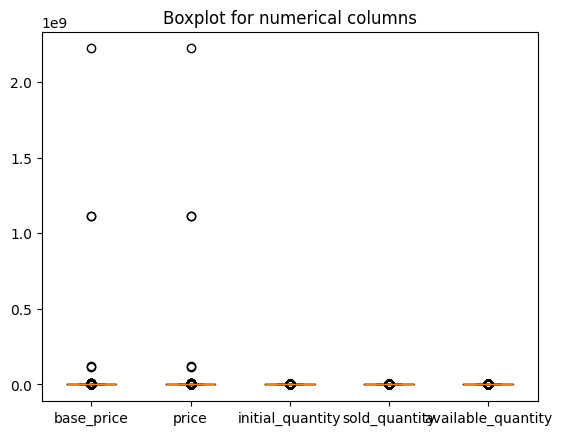

In [114]:
cols_to_plot = [
    'base_price', 'price', 'initial_quantity',
    'sold_quantity', 'available_quantity'
]

fig, ax = plt.subplots()
ax.boxplot(df_train[cols_to_plot])
ax.set_title('Boxplot for numerical columns')
ax.set_xticklabels(cols_to_plot)
plt.show()


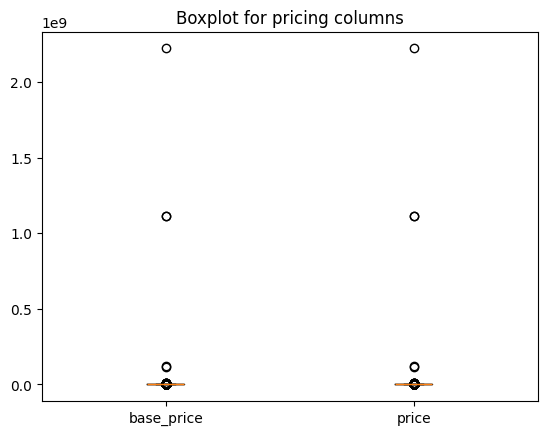

In [115]:
# Pricing outliers first
cols_to_plot = [
    'base_price', 'price'
]

fig, ax = plt.subplots()
ax.boxplot(df_train[cols_to_plot])
ax.set_title('Boxplot for pricing columns')
ax.set_xticklabels(cols_to_plot)
plt.show()


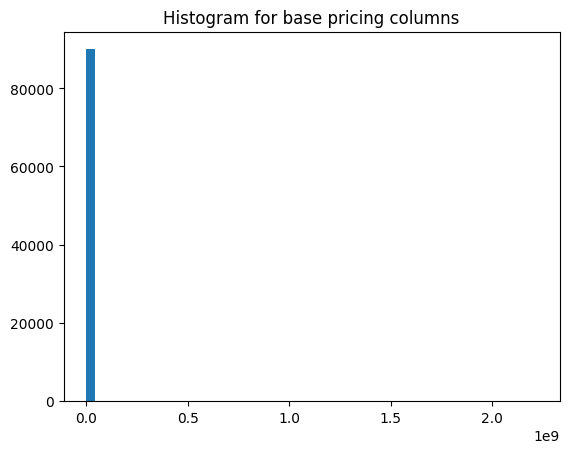

In [116]:
# Histograms for pricing (Base)
plt.hist(df_train['base_price'], bins=50)
plt.title('Histogram for base pricing columns')
plt.show()


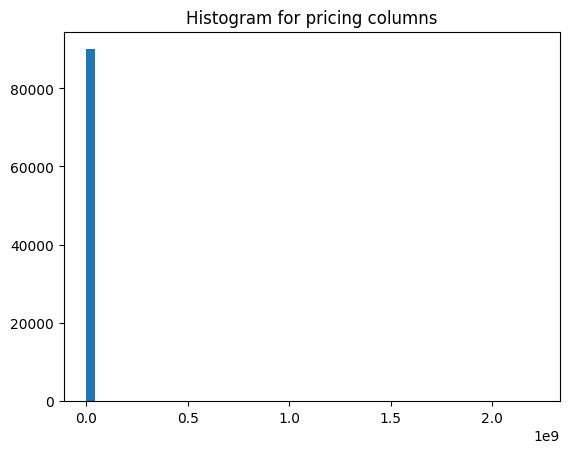

In [117]:
# Histograms for pricing
plt.hist(df_train['price'], bins=50)
plt.title('Histogram for pricing columns')
plt.show()


There are items with prices very far from the normal values, which are above 1.000.000 pesos ~ 2,857 USD.

In [118]:
# Items with prices over 1M
len(df_train.loc[df_train['price'] > 1000000])


54

In [119]:
df_train.loc[df_train['price'] > 1000000].title


1273     Casaquinta En Parque Leloir Con Pileta Y Excel...
1657                Lote En Venta -  - Xintel(leb-leb-843)
2107       Venta - Departamentos - Catamarca 1900 - Centro
3190         Inmueble Comercial En General Pacheco - Venta
3319     Cachimayo Edificio A Estrenar 37m2 Ubicación C...
4201                                      River Plate 2015
4222                      Proa Nordelta - Puerto Escondido
5064     Local Comercial A Estrenar - Fin De Obra 11/15...
5327     Departamento En Venta De 3 Dormitorios C/ Dep ...
10891                                                Campo
11974    Departamento En Venta De 2 Ambientes -  - Xint...
14145          Jeep Wrangler Rubicon 2015 286 Cv Con Cuero
15783    Casa Mejor Zona De San Lorenzo -  Calle Adoqui...
19192    Venta - Departamentos - Av. Alvear 1600 - Reco...
20424                          Iveco Stralis 410 Mod. 2012
25158    Departamentos A Estrenar 2 Ambientes En Torre ...
27166    Equipo Enganchado Scania 96 Con Acoplado Bonan.

In [120]:
# Correlation between prices and condition
corr = df_train[['price', 'base_price', 'condition']].copy()
corr['condition'] = corr['condition'].apply(lambda x: 1 if x == 'new' else 0)
display(corr.corr())


,price,base_price,condition
price,1.000000,1.000000,-0.000965
base_price,1.000000,1.000000,-0.000965
condition,-0.000965,-0.000965,1.000000


Outliers with very high prices are ok to keep as they are expensive items, people offering apartments, houses, cars, lots, etc. It may be worth using the descriptions as part of the features for our classifier.

The price and base_price are fully correlated so we can discard the base_price in this case and only use the price. The correlation is slighly negative, which means lower price --> new items, higher price --> used items. This is true only to a certain degree because the negative correlation is very low.

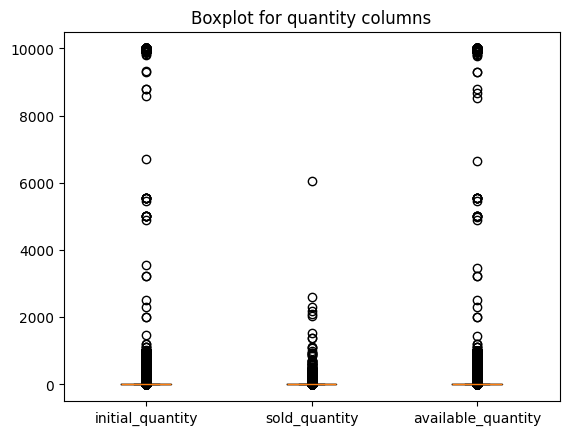

In [121]:
# Outliers for quantities
cols_to_plot = [
    'initial_quantity', 'sold_quantity', 'available_quantity'
]

fig, ax = plt.subplots()
ax.boxplot(df_train[cols_to_plot])
ax.set_title('Boxplot for quantity columns')
ax.set_xticklabels(cols_to_plot)
plt.show()


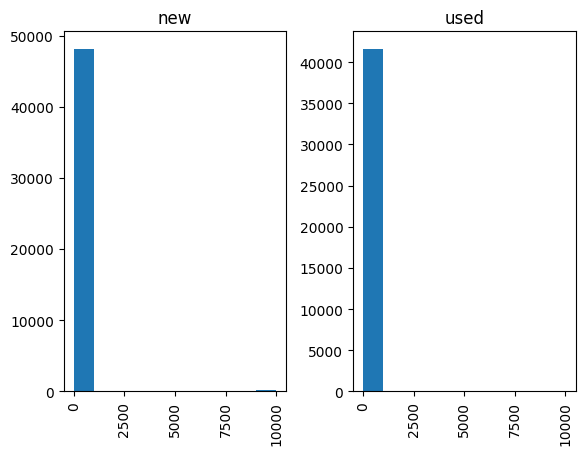

In [122]:
# Histograms for quantities
# fig = px.histogram(
#     df_train['initial_quantity'],
#     title = 'Histogram for initial quantity columns',
#     nbins = 50,
# )
# fig.show()
# df_train['initial_quantity'].hist(bins = 50)
df_train.hist(column = 'initial_quantity', by = 'condition')
plt.show()


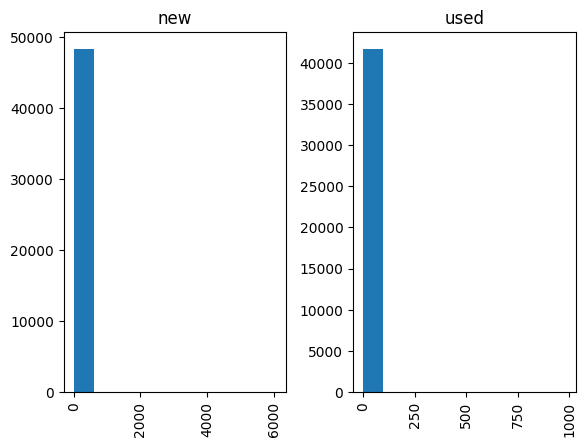

In [123]:
df_train.hist(column = 'sold_quantity', by = 'condition')
plt.show()


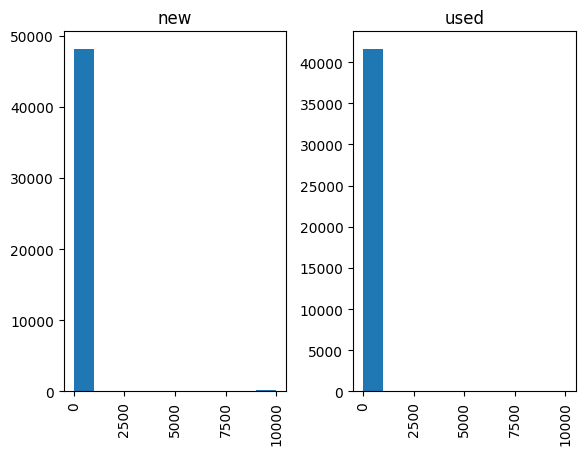

In [124]:
df_train.hist(column = 'available_quantity', by = 'condition')
plt.show()


Quantities are also good indicators, our logic points to used items usually are sold 1 by 1, so available quantities and initial quantities are 1 and haven't been sold yet. We can check the data to verify this.

In [125]:
print(f"Only one available quantity and conditions:\n{df_train.loc[df_train['available_quantity'] == 1].condition.value_counts()}")
print("----" * 10)
print(f"No items sold and their conditions:\n{df_train.loc[df_train['sold_quantity'] == 0].condition.value_counts()}")
print(f"Items sold more than once and their conditions:\n{df_train.loc[df_train['sold_quantity'] > 1].condition.value_counts()}")
print("----" * 10)
print(f"Items with only one available:\n{df_train.loc[(df_train['available_quantity'] == 1) & (df_train['initial_quantity'] == 1)].condition.value_counts()}")
print("----" * 10)
print(f"Items sold once and remaining one:\n{df_train.loc[(df_train['available_quantity'] == 1) & (df_train['initial_quantity'] == 1) & (df_train['sold_quantity'] == 1)].condition.value_counts()}")
print("----" * 10)
print(f"Items not sold but with one available:\n{df_train.loc[(df_train['available_quantity'] == 1) & (df_train['initial_quantity'] == 1) & (df_train['sold_quantity'] == 0)].condition.value_counts()}")


Only one available quantity and conditions:
condition
used    40324
new     23408
Name: count, dtype: int64
----------------------------------------
No items sold and their conditions:
condition
used    39971
new     34863
Name: count, dtype: int64
Items sold more than once and their conditions:
condition
new     8863
used     379
Name: count, dtype: int64
----------------------------------------
Items with only one available:
condition
used    40297
new     22948
Name: count, dtype: int64
----------------------------------------
Items sold once and remaining one:
condition
new     2061
used    1158
Name: count, dtype: int64
----------------------------------------
Items not sold but with one available:
condition
used    38917
new     18719
Name: count, dtype: int64


In [126]:
print(df_train.loc[df_train['sold_quantity'] == 6065].condition.value_counts())
print(df_train.loc[df_train['available_quantity'] == 9999].condition.value_counts())


condition
new    1
Name: count, dtype: int64
condition
new     65
used     1
Name: count, dtype: int64


In [127]:
df_train.loc[df_train['sold_quantity'] == 6065]


,warranty,sub_status,condition,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,accepts_mercadopago,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,initial_quantity,start_time,permalink,sold_quantity,available_quantity,seller_address.country.name,seller_address.country.id,seller_address.state.name,seller_address.state.id,seller_address.city.name,seller_address.city.id,shipping.local_pick_up,shipping.methods,shipping.tags,shipping.free_shipping,shipping.mode
6917,6 MESES Y LA MEJOR CALIDAD DEL MERCADO SIEMPRE!!,[],new,[],69.9,"[{'description': 'MasterCard', 'id': 'MLAMC', ...",9868297749,[],MLA,gold,69.9,[],buy_it_now,[dragged_bids_and_visits],,MLA1121081195,[],MLA90107,[{'id': 'MLA7371295890-913569249'}],2015-10-14T23:35:32.000Z,none,"[{'size': '500x500', 'secure_url': 'https://a2...",MLA7371295890,True,ARS,http://mla-s1-p.mlstatic.com/665501-MLA7371295...,Pendrive Kingston 8gb Dt101 G2 Mejor Precio Mi...,False,2015-09-07T01:19:52.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446772792000,active,941,1441588792000,http://articulo.mercadolibre.com.ar/MLA7371295...,6065,619,Argentina,AR,Capital Federal,AR-C,MICROCENTRO PEATONAL FLORIDA,,True,[],[],False,me2


In [128]:
df_train.loc[(df_train['available_quantity'] == 9999) & (df_train['condition'] == 'used')]


,warranty,sub_status,condition,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,accepts_mercadopago,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,initial_quantity,start_time,permalink,sold_quantity,available_quantity,seller_address.country.name,seller_address.country.id,seller_address.state.name,seller_address.state.id,seller_address.city.name,seller_address.city.id,shipping.local_pick_up,shipping.methods,shipping.tags,shipping.free_shipping,shipping.mode
83198,Calidad y Responsabilidad,[],used,[],400.0,"[{'description': 'Transferencia bancaria', 'id...",5030539825,[],MLA,free,400.0,[],buy_it_now,[],,None,[],MLA10060,[{'id': 'MLA7916340053-930744636'}],2015-09-26T17:33:05.000Z,none,"[{'size': '500x353', 'secure_url': 'https://a2...",MLA7916340053,True,ARS,http://mla-s1-p.mlstatic.com/598901-MLA7916340...,50 Llaveros Personalizados,False,2015-09-26T17:33:04.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448472784000,active,9999,1443288784000,http://articulo.mercadolibre.com.ar/MLA7916340...,0,9999,Argentina,AR,Buenos Aires,AR-B,Quilmes,,True,[],[],False,me2


In [129]:
df_train.loc[(df_train['available_quantity'] == 9999) & (df_train['condition'] == 'new')]


,warranty,sub_status,condition,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,accepts_mercadopago,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,initial_quantity,start_time,permalink,sold_quantity,available_quantity,seller_address.country.name,seller_address.country.id,seller_address.state.name,seller_address.state.id,seller_address.city.name,seller_address.city.id,shipping.local_pick_up,shipping.methods,shipping.tags,shipping.free_shipping,shipping.mode
398,Sí,[],new,[],850.00,"[{'description': 'Acordar con el comprador', '...",7786166796,[],MLA,silver,850.00,[],buy_it_now,[dragged_bids_and_visits],,MLA5712954687,[],MLA61153,[{'id': 'MLA5514963273-935854630'}],2015-10-02T19:32:00.000Z,none,"[{'size': '400x300', 'secure_url': 'https://a2...",MLA5514963273,True,ARS,http://mla-s1-p.mlstatic.com/6275-MLA551496327...,Protector De Manos Cubre Manos Wirtz 100% Alum...,False,2015-10-02T19:31:58.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448998318000,active,9999,1443814318000,http://articulo.mercadolibre.com.ar/MLA5514963...,28,9999,Argentina,AR,Capital Federal,AR-C,Devoto,,True,NaN,[],True,me2
800,Producto garantizado,[],new,[],300.00,[],5621923137,[],MLA,bronze,300.00,[],buy_it_now,[],,None,[],MLA14549,[{'id': 'MLA8764991647-940643635'}],2015-10-09T00:17:24.000Z,none,"[{'size': '259x194', 'secure_url': 'https://a2...",MLA8764991647,True,ARS,http://mla-s1-p.mlstatic.com/600901-MLA8764991...,"Alfombra Boucle Base Doble Alto Transito, Alf...",False,2015-10-09T00:17:23.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1449533843000,active,9999,1444349843000,http://articulo.mercadolibre.com.ar/MLA8764991...,0,9999,Argentina,AR,Capital Federal,AR-C,Caballito,TUxBQkNBQjM4MDda,False,[],[],False,not_specified
4382,GARANTÍA 10 AÑOS,[],new,[],298.00,[],4057247850,[],MLA,gold_premium,298.00,[],buy_it_now,"[poor_quality_thumbnail, dragged_bids_and_visits]",,MLA9293711712,[],MLA5806,[{'id': 'MLA1921725991-942352919'}],2015-10-11T21:12:51.763Z,none,"[{'size': '500x500', 'secure_url': 'https://a2...",MLA1921725991,True,ARS,http://mla-s1-p.mlstatic.com/266701-MLA1921725...,Radiador Baxi Helyos 500 - Incluye Set Univers...,False,2015-10-11T20:26:24.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1449779184000,active,9999,1444595184000,http://articulo.mercadolibre.com.ar/MLA1921725...,0,9999,Argentina,AR,Buenos Aires,AR-B,LANUS,,True,[],[],False,not_specified
4827,"Garantia oficial escrita + garantia, satisfacc...",[],new,[],949.99,"[{'description': 'Transferencia bancaria', 'id...",9786465330,[],MLA,bronze,949.99,[],buy_it_now,[dragged_bids_and_visits],,MLA5008979429,[],MLA126021,[{'id': 'MLA4377438038-909074947'}],2015-10-11T22:50:52.089Z,none,"[{'size': '500x500', 'secure_url': 'https://a2...",MLA4377438038,True,ARS,http://mla-s2-p.mlstatic.com/4002-MLA437743803...,Nebulizador Ultrasonico Digital Silfab Piccolo...,False,2015-09-01T16:30:48.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1446309047000,active,9999,1441125047000,http://articulo.mercadolibre.com.ar/MLA4377438...,1,9999,Argentina,AR,Capital Federal,AR-C,Capital Federal,,True,NaN,[],True,me2
5076,None,[],new,[],580.00,[],3244466158,[],MLA,bronze,580.00,[],buy_it_now,[],,None,[],MLA122629,[{'id': 'MLA3070338624-940037986'}],2015-10-08T03:34:13.000Z,none,"[{'size': '500x280', 'secure_url': 'https://a2...",MLA3070338624,True,ARS,http://mla-s2-p.mlstatic.com/612901-MLA3070338...,Quemador Industrial De Fundicion De 10000kcal.,False,2015-10-08T03:34:12.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449459252000,active,9999,1444275252000,http://articulo.mercadolibre.com.ar/MLA3070338...,0,9999,Argentina,AR,Capital Federal,AR-C,Villa del Parque,TUxBQlZJTDc4MDda,True,[],[],False,me2
...,...,...,...,...,...,.

In [130]:
# Calculate the correlation between the quantities and the condition
corr = df_train[['initial_quantity', 'sold_quantity', 'available_quantity', 'condition']].copy()
corr['condition'] = corr['condition'].apply(lambda x: 1 if x == 'new' else 0)
display(corr.corr())


,initial_quantity,sold_quantity,available_quantity,condition
initial_quantity,1.000000,0.067219,0.999944,0.072434
sold_quantity,0.067219,1.000000,0.060578,0.061176
available_quantity,0.999944,0.060578,1.000000,0.071967
condition,0.072434,0.061176,0.071967,1.000000


# Warranty
This field it's worth of analyzing to get a sense of the difference values, and how we could use this field as a feature for our model.

In [131]:
# Warranty
print(f'unique warranty values: {len(df_train.warranty.unique())}')
print(f"Top 10 warranty values: {df_train.warranty.value_counts()[:10]}")
print(f"Top 10 warranty values: {df_train.loc[~df_train['warranty'].isnull()].condition.value_counts()}")
# Relationship between warranty and condition
a = pd.pivot_table(
    df_train, values = 'title', index = 'warranty',
    columns = 'condition', aggfunc = len, fill_value = 0, sort = True,
)


unique warranty values: 9537
Top 10 warranty values: warranty
Sí               5107
Sin garantía     4907
SI                545
6 meses           489
6 MESES           361
Si                311
si                291
MI REPUTACION     192
3 meses           190
3 MESES           183
Name: count, dtype: int64
Top 10 warranty values: condition
new     21877
used    13366
Name: count, dtype: int64


In [132]:
a.sort_values(by = 'new', ascending = False).head(10)


condition,new,used
warranty,,
Sí,2170,2937
Sin garantía,1690,3217
6 meses,472,17
6 MESES,353,8
SI,292,253
Si,220,91
3 meses de garantia,181,2
si,178,113
3 MESES,177,6


At first sight it seems like this field could be used as an indicator but the values are variable and text written by humans so prompt to errors and would incur in more complex parsing initially. Even when parsed, we can see that the values of having warranty is pretty much the same for the new ones and the used ones (Value "si"). For the ones that don't have warranty, the balance is skewed to "used" items but the scale is small. 

**Conclusion**: We can skip this field analytics first, add a rule after if the performance is low as second step and for more complex scenario we can add text processing with more NLP techniques.

# List type fields
There are fields that are list data types:
- sub_status
- deal_ids
- non_mercado_pago_payment_methods
- variations
- attributes
- tags
- coverage_areas
- descriptions
- pictures
The first cleaning step is to verify which are the fields that contain data vs the ones that are mostly empty and delete the ones that are irrelevants.

In [133]:
list_type_cols = [
    'sub_status', 'deal_ids', 'non_mercado_pago_payment_methods', 'variations',
    'attributes', 'tags', 'coverage_areas', 'descriptions', 'pictures'
]
list_type_cols_data = {}
for col in list_type_cols:
    list_type_cols_data[col] = df_train[col].apply(
        lambda x: np.nan if len(x) == 0 else len(x)
    )

df_list_cols = pd.DataFrame(
    data = list_type_cols_data
)
df_list_cols.head()


,sub_status,deal_ids,non_mercado_pago_payment_methods,variations,attributes,tags,coverage_areas,descriptions,pictures
0,NaN,NaN,3.0,NaN,NaN,1.0,NaN,1.0,2.0
1,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,6.0
2,NaN,NaN,3.0,NaN,NaN,1.0,NaN,1.0,1.0
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,2.0
4,NaN,NaN,3.0,NaN,NaN,1.0,NaN,1.0,2.0


In [134]:
# Verify the percentage of values missing on each column.
missing_values = df_list_cols.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace = True, ascending = False)
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['name']
missing_values['percentage'] = round(missing_values / len(df_list_cols), 2)
missing_values.head(10)


,count,percentage
name,,
coverage_areas,90000,1.00
deal_ids,89783,1.00
sub_status,89109,0.99
variations,82626,0.92
attributes,78850,0.88
non_mercado_pago_payment_methods,27531,0.31
tags,22412,0.25
descriptions,2417,0.03
pictures,703,0.01


We can safely discard the following columns:
- coverage_areas
- deal_ids
- sub_status
- variations
- attributes

And work around the missing values for the rest of the columns. Let's also analyze the length of these fields before we move in as we may used them as part of the feature universe if they provide some useful information related to the condition of an item.

In [135]:
df_list_cols.drop(
    [
        'sub_status', 'deal_ids', 'variations',
        'attributes', 'coverage_areas',
    ],
    axis = 1,
    inplace = True
)


In [136]:
df_list_cols['condition'] = df_train['condition']
df_list_cols.describe()


,non_mercado_pago_payment_methods,tags,descriptions,pictures
count,62469.000000,67588.000000,87583.0,89297.000000
mean,2.278490,1.021601,1.0,2.953391
std,1.127268,0.145379,0.0,2.096308
min,1.000000,1.000000,1.0,1.000000
25%,2.000000,1.000000,1.0,1.000000
50%,2.000000,1.000000,1.0,2.000000
75%,3.000000,1.000000,1.0,4.000000
max,12.000000,2.000000,1.0,36.000000


### Number of pictures

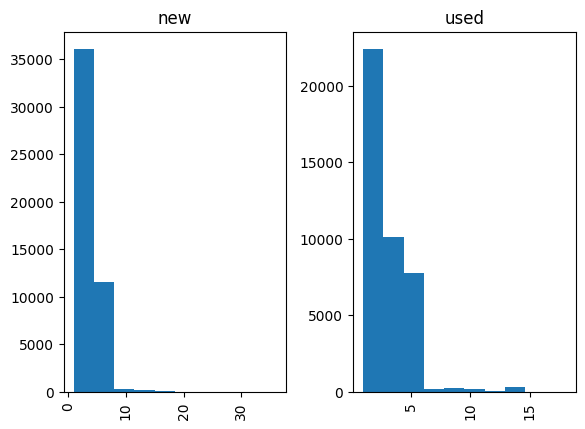

In [137]:
df_list_cols.hist(column = 'pictures', by = 'condition')
plt.show()


In [138]:
# Correlation between pictures and condition
corr = df_list_cols['pictures'].corr(df_list_cols['condition'].apply(lambda x: 1 if x == 'new' else 0))
print(f"Correlation between the number of pictures and the condition: {corr}")


Correlation between the number of pictures and the condition: 0.043327973579362036


### Number of tags

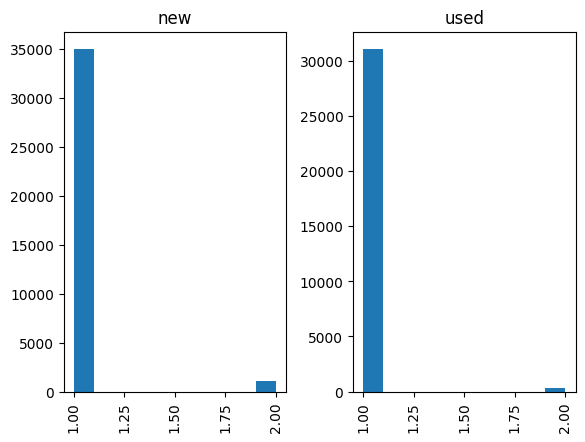

In [139]:
df_list_cols.hist(column = 'tags', by = 'condition')
plt.show()


In [140]:
# correlation between the number of tags and the condition
corr = df_list_cols['tags'].corr(df_list_cols['condition'].apply(lambda x: 1 if x == 'new' else 0))
print(f"Correlation between the number of tags and the condition: {corr}")


Correlation between the number of tags and the condition: 0.06681175957531157


The distribution of the number of pictures in an item shows that used items have less pictures (between 1 to 5) compared to the new items (between 0 and 10 for most). Both distrubutions are skewed to the left. The correlation is quite low (positive)

### Number of payment methods

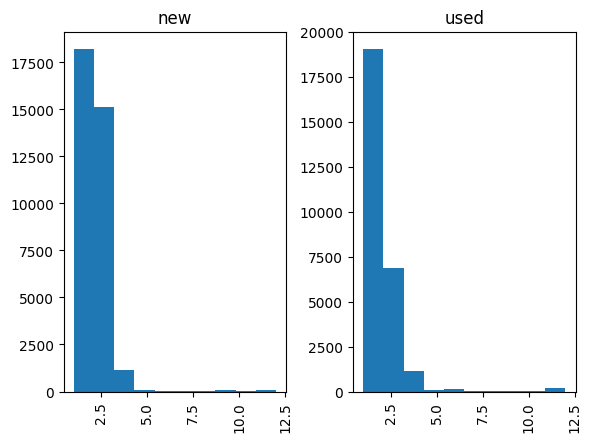

In [141]:
df_list_cols.hist(column = 'non_mercado_pago_payment_methods', by = 'condition')
plt.show()


In [142]:
# correlation between the number of payment methods and the condition
corr = df_list_cols['non_mercado_pago_payment_methods'].corr(df_list_cols['condition'].apply(lambda x: 1 if x == 'new' else 0))
print(f"Correlation between the number of payment methods and the condition: {corr}")


Correlation between the number of payment methods and the condition: 0.12006267504313003


condition,new,used
non_mercado_pago_payment_methods,,
MLAAM,252.0,281.0
MLABC,81.0,331.0
MLACD,271.0,299.0
MLADC,181.0,232.0
MLAMC,276.0,296.0
MLAMO,33520.0,26830.0
MLAMP,646.0,NaN
MLAMS,258.0,299.0
MLAOT,15751.0,6378.0


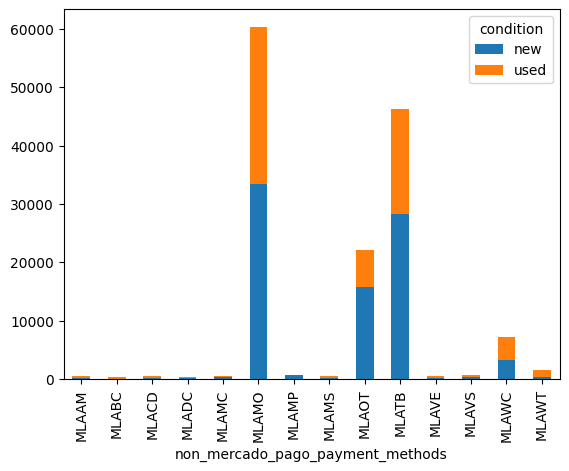

Chi-square statistic: 4121.627745439245
p-value: 0.0
Degrees of freedom: 13
Expected values:
[[  313.54637299   219.45362701]
 [  242.36605192   169.63394808]
 [  335.3122563    234.6877437 ]
 [  242.95431904   170.04568096]
 [  336.48879053   235.51120947]
 [35501.92046932 24848.07953068]
 [  380.02055714   265.97944286]
 [  327.66478378   229.33521622]
 [13017.76301683  9111.23698317]
 [27236.76748516 19063.23251484]
 [  331.7826536    232.2173464 ]
 [  367.66694769   257.33305231]
 [ 4220.81655953  2954.18344047]
 [  875.92973619   613.07026381]]


In [143]:
# Explore the values of non_mercado_pago_payment_methods
def get_payment_methods(x):
    if len(x) == 0:
        return []
    else:
        return [d['id'] for d in x]

non_mercado_payment_methods_counts =  pd.merge(
    df_train['non_mercado_pago_payment_methods'].apply(get_payment_methods).explode(),
    df_train['condition'],
    left_index = True,
    right_index = True
).groupby(
    ['non_mercado_pago_payment_methods', 'condition']
).size().unstack()

display(non_mercado_payment_methods_counts)
non_mercado_payment_methods_counts.plot(kind = 'bar', stacked = True)
plt.show()

non_mercado_payment_methods_counts.fillna(0, inplace = True)
chi2, p, dof, expected = chi2_contingency(non_mercado_payment_methods_counts)
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)


The distributions for number of payment methods shows that there some differences between the conditions, the correlation is positive but weak, showing some potential for usage of this variable in the modelling.

The classess are a potential feature as a one hot encoded variable. This is becasue the Chi-square statistic is quite large and the p-value is zero, which means that the distribution of the appearance of these classess in items by the condition is not likely to be a coincidence.

As a conclusion from this section:
- The number of pictures could be an indicative variable for the new/used items.
- The number of payment methods is a possible feature.
- The non_mercado_pago_payment_methods classes are a potential feature as a one hot encoded variable.
- The number of tags does not indicate real value in the condition of the item.

In [144]:
# Remove empty columns
df_train.drop(
    [
        'sub_status', 'deal_ids', 'variations',
        'attributes', 'coverage_areas',
    ],
    axis = 1,
    inplace = True
)

# Rename columns
df_list_cols.rename(
    columns = {
        'non_mercado_pago_payment_methods': 'non_mercado_pago_payment_methods_count',
        'descriptions': 'descriptions_count',
        'pictures': 'pictures_count',
    },
    inplace = True
)
# Drop columns with no intrinsic value
df_list_cols.drop(
    [
        'tags', 'condition'
    ],
    axis = 1,
    inplace = True
)

# Merge the dataframes
df_train = pd.concat([df_train, df_list_cols], axis = 1)
df_train.head()


,warranty,condition,base_price,non_mercado_pago_payment_methods,seller_id,site_id,listing_type_id,price,buying_mode,tags,listing_source,parent_item_id,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,accepts_mercadopago,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,initial_quantity,start_time,permalink,sold_quantity,available_quantity,seller_address.country.name,seller_address.country.id,seller_address.state.name,seller_address.state.id,seller_address.city.name,seller_address.city.id,shipping.local_pick_up,shipping.methods,shipping.tags,shipping.free_shipping,shipping.mode,non_mercado_pago_payment_methods_count,descriptions_count,pictures_count
0,None,new,80.0,"[{'description': 'Transferencia bancaria', 'id...",8208882349,MLA,bronze,80.0,buy_it_now,[dragged_bids_and_visits],,MLA6553902747,MLA126406,[{'id': 'MLA4695330653-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA4695330653,True,ARS,http://mla-s1-p.mlstatic.com/5386-MLA469533065...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,Argentina,AR,Capital Federal,AR-C,San Cristóbal,TUxBQlNBTjkwNTZa,True,[],[],False,not_specified,3.0,1.0,2.0
1,NUESTRA REPUTACION,used,2650.0,"[{'description': 'Transferencia bancaria', 'id...",8141699488,MLA,silver,2650.0,buy_it_now,[],,MLA7727150374,MLA10267,[{'id': 'MLA7160447179-930764806'}],2015-09-26T18:08:34.000Z,none,"[{'size': '499x334', 'secure_url': 'https://a2...",MLA7160447179,True,ARS,http://mla-s1-p.mlstatic.com/23223-MLA71604471...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,Argentina,AR,Capital Federal,AR-C,Buenos Aires,,True,[],[],False,me2,2.0,1.0,6.0
2,None,used,60.0,"[{'description': 'Transferencia bancaria', 'id...",8386096505,MLA,bronze,60.0,buy_it_now,[dragged_bids_and_visits],,MLA6561247998,MLA1227,[{'id': 'MLA7367189936-916478256'}],2015-09-09T23:57:10.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7367189936,True,ARS,http://mla-s1-p.mlstatic.com/22076-MLA73671899...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,Argentina,AR,Capital Federal,AR-C,Boedo,TUxBQkJPRTQ0OTRa,True,[],[],False,me2,3.0,1.0,1.0
3,None,new,580.0,"[{'description': 'Transferencia bancaria', 'id...",5377752182,MLA,silver,580.0,buy_it_now,[],,None,MLA86345,[{'id': 'MLA9191625553-932309698'}],2015-10-05T16:03:50.306Z,none,"[{'size': '441x423', 'secure_url': 'https://a2...",MLA9191625553,True,ARS,http://mla-s2-p.mlstatic.com/183901-MLA9191625...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,Argentina,AR,Capital Federal,AR-C,Floresta,TUxBQkZMTzg5MjFa,True,[],[],False,me2,3.0,1.0,2.0
4,MI REPUTACION.,used,30.0,"[{'description': 'Transferencia bancaria', 'id...",2938071313,MLA,bronze,30.0,buy_it_now,[dragged_bids_and_visits],,MLA3133256685,MLA41287,[{'id': 'MLA7787961817-902981678'}],2015-08-28T13:37:41.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7787961817,True,ARS,http://mla-s2-p.mlstatic.com/13595-MLA77879618...,Serenata - Jennifer Blake,False,2015-08-24T22:07:20.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1445638040000,active,1,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,Argentina,AR,Buenos Aires,AR-B,Tres de febrero,TUxBQ1RSRTMxODE5NA,True,[],[],False,not_specified,3.0,1.0,

## Tags

In [145]:
# Unique values for tags
print(
    df_train.tags.apply(
        lambda x: '<->'.join(x) if len(x) > 0 else np.nan
    ).unique()
)


['dragged_bids_and_visits' nan
 'good_quality_thumbnail<->dragged_bids_and_visits'
 'good_quality_thumbnail' 'dragged_visits' 'dragged_visits<->free_relist'
 'poor_quality_thumbnail<->dragged_bids_and_visits'
 'poor_quality_thumbnail']


In [146]:
def count_rows_by_tags_and_condition(df, condition):
    """
    This function takes a dataframe and a condition as input and returns a dataframe with the count of rows
    where the condition is equal to the input condition, grouped by each value in the column "tags" of type list.
    """
    # Create a copy of the dataframe to avoid modifying the original dataframe
    df_copy = df.copy()

    # Filter the dataframe by the input condition
    df_copy = df_copy[df_copy['condition'] == condition]

    # Create a new dataframe with the count of rows where the condition is equal to the input condition,
    # grouped by each value in the column "tags" of type list
    tags_count = df_copy.explode('tags').groupby('tags').size().reset_index(name = 'count')

    return tags_count

print("----" * 5, "used", "----" * 5)
display(
    count_rows_by_tags_and_condition(
        df_train, 'used'
    )
)
print("----" * 5, "new", "----" * 5)
display(
    count_rows_by_tags_and_condition(
        df_train, 'new'
    )
)


-------------------- used --------------------


,tags,count
0,dragged_bids_and_visits,30841
1,dragged_visits,542
2,free_relist,249
3,good_quality_thumbnail,174


-------------------- new --------------------


,tags,count
0,dragged_bids_and_visits,35675
1,dragged_visits,181
2,free_relist,10
3,good_quality_thumbnail,1363
4,poor_quality_thumbnail,13


One hot encoding seems like a good approach to deal with tags. We can consider certain differences between used and new by the amount of rows in the `good_quality_thumbnail` or `dragged_visits`.

In [147]:
### Listing source seemse to be an empty "object" column
print(df_train['listing_source'].unique())
# Drop the column as it is empty
df_train.drop('listing_source', axis = 1, inplace = True)


['']


In [148]:
### international_delivery_mode seems to be an empty "object" column
print(df_train['international_delivery_mode'].unique())
# Drop the column as it is empty
df_train.drop('international_delivery_mode', axis = 1, inplace = True)


['none']


In [149]:
# shipping.methods and shipping.tags seem to be empty "list" columns
print(df_train['shipping.methods'].apply(type).unique())
# print unique values for each of the types of the column
print("----" * 5, "list", "----" * 5)
print(df_train.loc[df_train['shipping.methods'].apply(type) == list, 'shipping.methods'].apply(lambda x: '<->'.join(x)).unique())
print("----" * 5, "float", "----" * 5)
print(df_train.loc[df_train['shipping.methods'].apply(type) == float, 'shipping.methods'].unique())
print("----" * 5, "None", "----" * 5)
print(df_train.loc[df_train['shipping.methods'].apply(type) == None, 'shipping.methods'].unique())
# This column seems to be empty, so we can drop it
df_train.drop('shipping.methods', axis = 1, inplace = True)


[<class 'list'> <class 'float'> <class 'NoneType'>]
-------------------- list --------------------
['']
-------------------- float --------------------
[nan]
-------------------- None --------------------
[]


In [150]:
# shipping.tags seems to be an empty "list" column
print(df_train['shipping.tags'].apply(type).unique())
print("----" * 5, "list", "----" * 5)
print(df_train.loc[df_train['shipping.tags'].apply(type) == list, 'shipping.tags'].apply(lambda x: '<->'.join(x)).unique())

def count_rows_by_tags_and_condition(df, condition):
    """
    This function takes a dataframe and a condition as input and returns a dataframe with the count of rows
    where the condition is equal to the input condition, grouped by each value in the column "tags" of type list.
    """
    # Create a copy of the dataframe to avoid modifying the original dataframe
    df_copy = df.copy()

    # Filter the dataframe by the input condition
    df_copy = df_copy[df_copy['condition'] == condition]

    # Create a new dataframe with the count of rows where the condition is equal to the input condition,
    # grouped by each value in the column "tags" of type list
    tags_count = df_copy.explode('shipping.tags').groupby('shipping.tags').size().reset_index(name = 'count')

    return tags_count

print("----" * 5, "used", "----" * 5)
print(
    count_rows_by_tags_and_condition(
        df_train, 'used'
    )
)
print("----" * 5, "new", "----" * 5)
print(
    count_rows_by_tags_and_condition(
        df_train, 'new'
    )
)

# Very few values for this column, so we can discard it
df_train.drop('shipping.tags', axis = 1, inplace = True)


[<class 'list'>]
-------------------- list --------------------
['' 'relisted_with_modifications' 'free_method_upgraded']
-------------------- used --------------------
                 shipping.tags  count
0  relisted_with_modifications     18
-------------------- new --------------------
                 shipping.tags  count
0         free_method_upgraded      9
1  relisted_with_modifications     32


## IDS
Let's see what we can gather from the ID fields:
```python
[
    'seller_id', 'site_id', 'listing_type_id', 'parent_item_id', 
    'category_id', 'id', 'currency_id', 'seller_address.country.id', 
    'seller_address.state.id', 'seller_address.city.id'
]
```

In [151]:
print("----" * 5, "seller_address.country.id", "----" * 5)
print(df_train.groupby('condition')['seller_address.country.id'].value_counts().sort_values(ascending=False))
print("----" * 5, "seller_address.state.id", "----" * 5)
print(df_train.groupby('condition')['seller_address.state.id'].value_counts().sort_values(ascending=False))
print("----" * 5, "seller_address.city.id", "----" * 5)
print(df_train.groupby('condition')['seller_address.city.id'].value_counts().sort_values(ascending=False))


-------------------- seller_address.country.id --------------------
condition  seller_address.country.id
new        AR                           48352
used       AR                           41647
                                            1
Name: count, dtype: int64
-------------------- seller_address.state.id --------------------
condition  seller_address.state.id
new        AR-C                       28060
used       AR-C                       24083
new        AR-B                       16578
used       AR-B                       14904
new        AR-S                        1221
used       AR-S                        1177
new        AR-X                        1156
used       AR-X                         571
new        AR-U                         274
           AR-M                         217
used       AR-M                         183
           AR-E                         142
new        AR-T                         130
           AR-E                         107
           AR-

The location IDs may not provide some information that is relevant to the condition of the item offered. The top 3 values are pretty much the same for the state and then the city ID has many missing values at top. So as a conclusion we can safely discard these fields.

In [152]:
# Drop the columns with the ids
df_train.drop(
    [
        'seller_address.country.id', 'seller_address.state.id', 'seller_address.city.id'
    ],
    axis = 1,
    inplace = True
)


In [153]:
# Seller ID
print(len(df_train['seller_id'].unique()))
print(df_train.loc[df_train.condition == 'new']['seller_id'].value_counts())
print(df_train.loc[df_train.condition == 'used']['seller_id'].value_counts())


33281
seller_id
5248662274    795
2015548469    654
7704929703    424
8612126795    318
2266082781    302
             ... 
3056327825      1
2287738274      1
6743225831      1
8751693737      1
1347894917      1
Name: count, Length: 18983, dtype: int64
seller_id
4631246902    406
6972484560    256
8326621157    209
4248718919    209
7694743641    168
             ... 
2864688626      1
7157153967      1
2314784952      1
4300841608      1
9518711314      1
Name: count, Length: 16148, dtype: int64


There are way too many individuals and no the counts per seller are not evenly distributed which sigguest that this column may not have a strong relationship with the condition of the item. So let's remove this column.

In [154]:
df_train.drop('seller_id', axis = 1, inplace = True)


In [155]:
# Site ID
print(df_train['site_id'].unique())
# This one is easy, only one value so we can drop it
df_train.drop('site_id', axis = 1, inplace = True)


['MLA']


In [156]:
# ID and Parent Item ID
print(df_train[['parent_item_id', 'id']].describe())
# Create a column that indicates if the item has a parent item or not
parents = pd.DataFrame()
parents['has_parent'] = df_train['parent_item_id'].apply(lambda x: 0 if pd.isnull(x) else 1)
parents['condition'] = df_train['condition']
parents.groupby('condition')['has_parent'].value_counts()


       parent_item_id             id
count           69310          90000
unique          69310          90000
top     MLA6553902747  MLA4695330653
freq                1              1


condition  has_parent
new        1             36921
           0             11431
used       1             32389
           0              9259
Name: count, dtype: int64

In [157]:
# Drop the columns
df_train.drop('parent_item_id', axis = 1, inplace = True)


There is not much difference between parents for new and used, the difference is slightly lower for items that has parent that are used vs the new ones so we can conclude that this field is not really relevant for our analysis.

In [158]:
# Category ID
print("Unique values: ", len(df_train['category_id'].unique()))
print(df_train['category_id'].value_counts())
print(df_train.groupby('condition')['category_id'].value_counts(ascending = False))
print("---" * 5, "new", "---" * 5)
print(df_train.loc[df_train['condition'] == 'new']['category_id'].value_counts())
print("---" * 5, "used", "---" * 5)
print(df_train.loc[df_train['condition'] == 'used']['category_id'].value_counts())


Unique values:  10491
category_id
MLA1227      4139
MLA2044      1759
MLA41287      829
MLA3530       685
MLA2038       601
             ... 
MLA376520       1
MLA32782        1
MLA96545        1
MLA100025       1
MLA7212         1
Name: count, Length: 10491, dtype: int64
condition  category_id
new        MLA1227        2039
           MLA2044         432
           MLA3530         416
           MLA85960        328
           MLA6651         303
                          ... 
used       MLA14437          1
           MLA14433          1
           MLA14430          1
           MLA1422           1
           MLA99994          1
Name: count, Length: 13980, dtype: int64
--------------- new ---------------
category_id
MLA1227      2039
MLA2044       432
MLA3530       416
MLA85960      328
MLA6651       303
             ... 
MLA334088       1
MLA72720        1
MLA79239        1
MLA127376       1
MLA373722       1
Name: count, Length: 7908, dtype: int64
--------------- used ---------------

In [159]:
df_train.loc[df_train.category_id == 'MLA41287'].title.head(20)


4                               Serenata - Jennifer Blake
28                 Bolivia Construcciones   Bruno Morales
78      Eduardo Baliari: Los Monumentos. Almario De Bu...
166     Elige Tu Propia Aventura Nº 32 Problemas En El...
383                                       Tutankamón Jacq
419                   El Ruiseñor Y La Rosa - Oscar Wilde
449     Dalmiro Saenz Cuentos Para Niños Pornograficos...
602       El Arma En El Hombre - Horacio Castellanos Moya
1087            Sumisión Michel Houellebecq Libro Digital
1139    Friends United 3 Student´s Book Macmillan Free...
1360       Ceal Narrativa Alemana Actual Selección Envíos
1538    Mi Animal Imposible  Guillermo Saavedra   Alfa...
1602                              El Decameron. Boccaccio
1675                    Benito Cereno     Hernan Melville
1752    El Mundo Silencioso - J.y.cousteau Y Frederic ...
1875    Arthur Hailey Vuelo Hacia El Peligro Aviacion ...
2029                          Aforismos De Oro     Seneca
2054    Doris 

The category ID fow new and used items do not show much difference which suggests that the variable may not be strongly related to the target variable. One difrerence is in this category: MLA41287, which seems to be present as top 3 in the used items by category and not present in the new items. The percentage is very little, and it could hardly make any difference in practical terms. This ID seems to be related to **books**, which makes sense. My conclusion from this would be to delete the field and not include it in next process.

In [160]:
# Drop the column
df_train.drop('category_id', axis = 1, inplace = True)


In [161]:
# Currency ID
print(df_train['currency_id'].unique())
print("----" * 5, "new", "----" * 5)
print(df_train.loc[df_train['condition'] == 'new']['currency_id'].value_counts())
print("----" * 5, "used", "----" * 5)
print(df_train.loc[df_train['condition'] == 'used']['currency_id'].value_counts())


['ARS' 'USD']
-------------------- new --------------------


currency_id
ARS    48165
USD      187
Name: count, dtype: int64
-------------------- used --------------------
currency_id
ARS    41331
USD      317
Name: count, dtype: int64


Similar thought to other IDs, the currency even though there are two values, they are pretty much AR pesos and no real difference between the distributions for new/used items. USD is lower for both cases (slightly more in used items) but in general this does not seem to relate directly to the target variable so we will delete this column.

In [162]:
# Drop the column
df_train.drop('currency_id', axis = 1, inplace = True)


### Descriptions
Let's see what we can gather from the descriptions field.

In [163]:
print(df_train.descriptions.apply(lambda x: len(x)).describe())
print(
    "Percentage of items with empty description "
    f"{len(df_train.loc[df_train.descriptions.apply(lambda x: len(x)) == 0]) / len(df_train) * 100:.2f}%"
)


count    90000.000000
mean         0.973144
std          0.161662
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: descriptions, dtype: float64
Percentage of items with empty description 2.69%


In [164]:
# Let's check what are the top 10 most common values in the description field
pd.json_normalize(
    df_train \
        .explode('descriptions') \
        .descriptions \
        .dropna() \
        .str.replace("'", '"') \
        .apply(json.loads)
).value_counts(
    ascending = False
)


id                     
MLA1000058677-940578684    1
MLA6996826236-942163505    1
MLA6998116943-936244489    1
MLA6997858472-900939495    1
MLA6997849108-907619583    1
                          ..
MLA3984748099-902347716    1
MLA3984538092-904418834    1
MLA3984531400-936567458    1
MLA3984516611-908599291    1
MLA9999792386-942322103    1
Name: count, Length: 87583, dtype: int64

The descriptions field is composed by the ID of the project plus a number that doesn't represent anything derived directly from the dataset, probably is the ID of the text stored somewhere else. So, we will remove this field too as it wont help us here.

In [165]:
# drop the descriptions column
df_train.drop('descriptions', axis = 1, inplace = True)


## Booleans
We are going to review what we can extract and if we can use the boolean fields as variables to our model. The boolean fields are:
```python
[
    'accepts_mercadopago', 'automatic_relist', 'shipping.free_shipping',
    'shipping.local_pick_up'
]
```

condition,new,used
accepts_mercadopago,,
False,455,1527
True,47897,40121


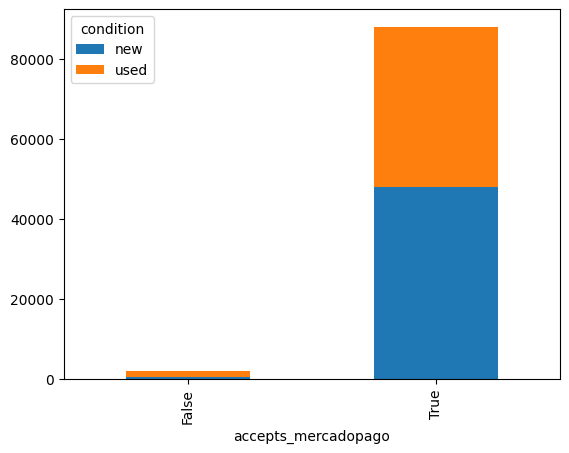

In [166]:
# accepts_mercadopago
accepts_mercadopago_counts = df_train.groupby(['accepts_mercadopago', 'condition']).size().unstack()
display(accepts_mercadopago_counts)
accepts_mercadopago_counts.plot(kind = 'bar', stacked = True)
plt.show()


In [167]:
corr = df_train['accepts_mercadopago'].corr(df_train['condition'].apply(lambda x: 1 if x == 'new' else 0))
print(f"Correlation between accepts_mercadopago and condition: {corr}")


Correlation between accepts_mercadopago and condition: 0.09259791909156484


The correlation between these two variables is a weak positive correlation which means that slighly the items that accept mercado pago tend to be new, but the correlation is weak. Using this variable could still bring some value to our model so I will use it as it is.

condition,new,used
automatic_relist,,
False,44313,41460
True,4039,188


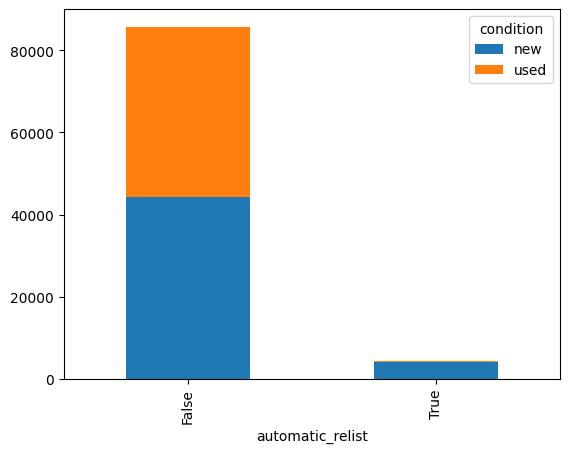

In [168]:
# automatic_relist
automatic_relist_counts = df_train.groupby(['automatic_relist', 'condition']).size().unstack()
display(automatic_relist_counts)
automatic_relist_counts.plot(kind = 'bar', stacked = True)
plt.show()


In [169]:
# correlation between automatic_relist and condition
corr = df_train['automatic_relist'].corr(df_train['condition'].apply(lambda x: 1 if x == 'new' else 0))
print(f"Correlation between automatic_relist and condition: {corr}")


Correlation between automatic_relist and condition: 0.1862283035954879


The correlation is a weak positive correlation, which can indicate some relation between the automatic relisting items for new items vs the used ones. This assumption makes sense as it is more likely for new items to be relisted automatically by the seller. This variable will provide value to our future model.

condition,new,used
shipping.free_shipping,,
False,45851,41452
True,2501,196


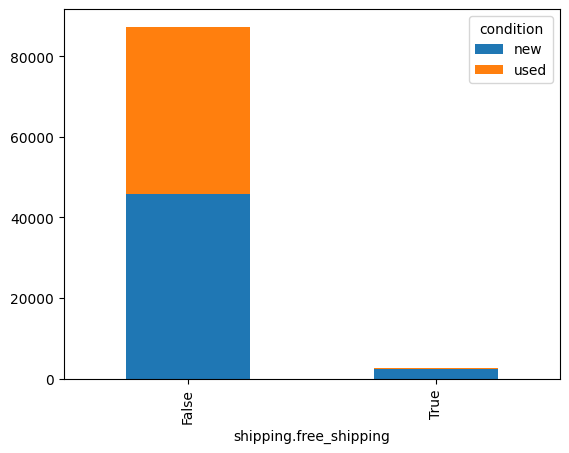

In [170]:
# shipping.free_shipping
free_shipping_counts = df_train.groupby(['shipping.free_shipping', 'condition']).size().unstack()
display(free_shipping_counts)
free_shipping_counts.plot(kind = 'bar', stacked = True)
plt.show()


In [171]:
# correlation
corr = df_train['shipping.free_shipping'].corr(df_train['condition'].apply(lambda x: 1 if x == 'new' else 0))
print(f"Correlation between shipping.free_shipping and condition: {corr}")


Correlation between shipping.free_shipping and condition: 0.13750555772156525


The correlation again is weak positive, indicating that the items that are set with free shipping are more likely to be new items than used ones with free shipping. Items with free shipping are more in proportion to be news than to be used ones. We will use this field as it is as it seems to add value.

condition,new,used
shipping.local_pick_up,,
False,9138,9285
True,39214,32363


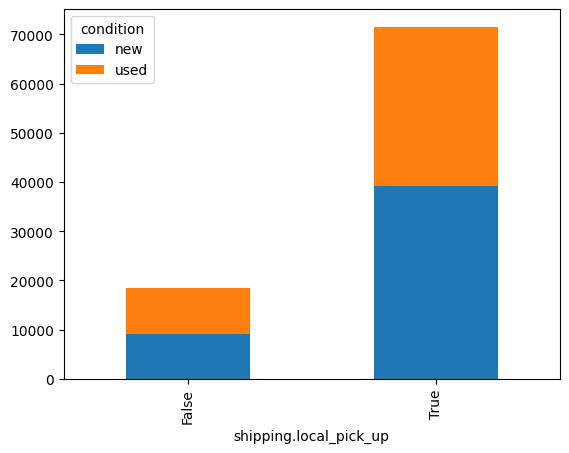

In [172]:
# shipping.local_pick_up
local_pick_up_counts = df_train.groupby(['shipping.local_pick_up', 'condition']).size().unstack()
display(local_pick_up_counts)
local_pick_up_counts.plot(kind = 'bar', stacked = True)
plt.show()


In [173]:
# correlation
corr = df_train['shipping.local_pick_up'].corr(df_train['condition'].apply(lambda x: 1 if x == 'new' else 0))
print(f"Correlation between shipping.local_pick_up and condition: {corr}")


Correlation between shipping.local_pick_up and condition: 0.041955349997948234


Similar conclusion, we can use the field as it is but by the correlation being weak positive is not a very good indicative variable for classifying an item as new/used.

### Categorical values
There are categorical values that we can use in our analysis. Let's review these:
```python
[
    'listing_type_id', 'buying_mode', 'status', 'shipping.mode',
    'seller_address.country.name', 'seller_address.state.name', 
    'seller_address.city.name'
]
```

condition,new,used
listing_type_id,,
bronze,35410.0,21494.0
free,1428.0,17832.0
gold,1869.0,301.0
gold_premium,416.0,349.0
gold_pro,13.0,NaN
gold_special,2641.0,52.0
silver,6575.0,1620.0


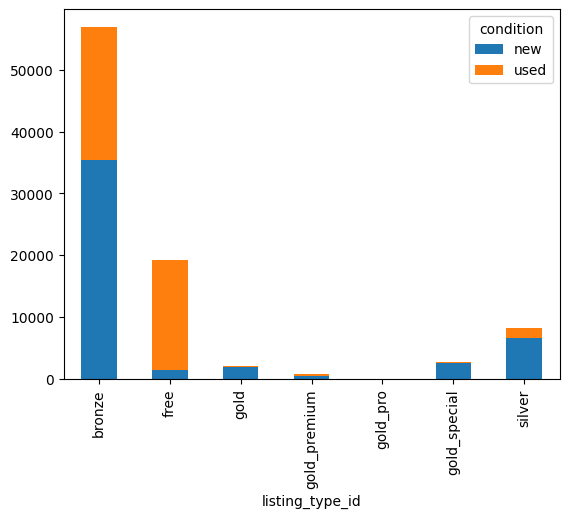

In [174]:
# Calculate the frequency distribution of listing_type_id with respect to the condition
listing_type_id_counts = df_train.groupby(['listing_type_id', 'condition']).size().unstack()
display(listing_type_id_counts)
listing_type_id_counts.plot(kind = 'bar', stacked = True)
plt.show()


The listing_type_id is an interesting feature, that may be useful for predicting the condition, we can see that used items are published using the free listing while new items are less li?kely to be posted by free and more likely to use bronze, silver, gold, etc. For treating this field, we can possible use one-hot-encoding.

In [175]:
# Calculate the chi-square statistic and p-value for the listing_type_id with respect to the condition
listing_type_id_counts.fillna(0, inplace=True)
chi2, p, dof, expected = chi2_contingency(listing_type_id_counts)
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)


Chi-square statistic: 23643.37631870426
p-value: 0.0
Degrees of freedom: 6
Expected values:
[[3.05713579e+04 2.63326421e+04]
 [1.03473280e+04 8.91267200e+03]
 [1.16582044e+03 1.00417956e+03]
 [4.10992000e+02 3.54008000e+02]
 [6.98417778e+00 6.01582222e+00]
 [1.44679929e+03 1.24620071e+03]
 [4.40271822e+03 3.79228178e+03]]


It's interesisting to note that the value of the chi-squared statistic is relatively large, which indicated a larger difference between the observed and expected fequency distributions, this can suggest a stronger relationship between the listing type and the condition, while the p-value remains 0, which siggest that there is statistically significant relationship, in fact the p-value bein lower indicates a smaller probability that this is by chance, and logically our thoughts of using this variable are correct.

condition,new,used
buying_mode,,
auction,228,479
buy_it_now,47669,39642
classified,455,1527


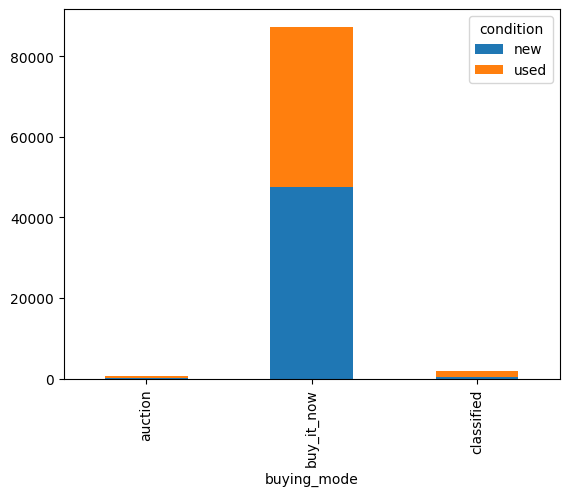

In [176]:
# Buyig mode
buying_mode_counts = df_train.groupby(['buying_mode', 'condition']).size().unstack()
display(buying_mode_counts)
buying_mode_counts.plot(kind = 'bar', stacked = True)
plt.show()


In [177]:
# Calculate the chi-square statistic and p-value for the buying_mode with respect to the condition
buying_mode_counts.fillna(0, inplace=True)
chi2, p, dof, expected = chi2_contingency(buying_mode_counts)
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)


Chi-square statistic: 912.5786927349235
p-value: 6.85574603829237e-199
Degrees of freedom: 2
Expected values:
[[  379.83182222   327.16817778]
 [46907.34968889 40403.65031111]
 [ 1064.81848889   917.18151111]]


The statistics can indicate that there is a difference between the observed and expected frequency, which may indicate a relationship between the buying_mode and the condition. 
Given the small p-value, the changes that there is a lower probability of observing a chi=square statistic as large as 912 if there were none relationshio between the buying_mode and condition.

As a conclusion we can use this field as it will add value to our future model, we can use one hot encoding similar to listing type.

condition,new,used
status,,
active,45712.0,40404.0
closed,9.0,11.0
not_yet_active,1.0,NaN
paused,2630.0,1233.0


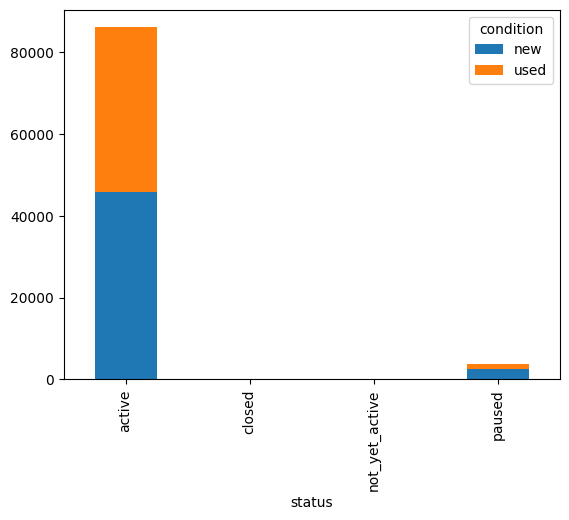

In [178]:
# Status
status_counts = df_train.groupby(['status', 'condition']).size().unstack()
display(status_counts)
status_counts.plot(kind = 'bar', stacked = True)
plt.show()


In [179]:
# Calculate the chi-square statistic and p-value for the status with respect to the condition
status_counts.fillna(0, inplace=True)
chi2, p, dof, expected = chi2_contingency(status_counts)
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)


Chi-square statistic: 336.0701396025397
p-value: 1.5478825281970402e-72
Degrees of freedom: 3
Expected values:
[[4.62653426e+04 3.98506574e+04]
 [1.07448889e+01 9.25511111e+00]
 [5.37244444e-01 4.62755556e-01]
 [2.07537529e+03 1.78762471e+03]]


The chi-squared value is relatively large (less then previous tests with other variables) and the p-value is low, which can indicate some relationship with the condition. We will keep this field and using it in our model.

In [180]:
# 'seller_address.country.name', 'seller_address.state.name', 'seller_address.city.name'
print("----" * 5, "Country", "----" * 5)
print("Size:", len(df_train['seller_address.country.name'].unique()))
print(df_train['seller_address.country.name'].unique())
print("----" * 5, "State", "----" * 5)
print("Size:", len(df_train['seller_address.state.name'].unique()))
print(df_train['seller_address.state.name'].unique())
print(df_train.groupby('condition')['seller_address.state.name'].value_counts(ascending = False))
print("----" * 5, "City", "----" * 5)
print("Size:", len(df_train['seller_address.city.name'].unique()))
print(df_train['seller_address.city.name'].unique())


-------------------- Country --------------------
Size: 2
['Argentina' '']
-------------------- State --------------------
Size: 25
['Capital Federal' 'Buenos Aires' 'Santa Fe' 'Tucumán' 'Mendoza' 'Córdoba'
 'La Pampa' 'Chubut' 'Entre Ríos' 'Jujuy' 'Santiago del Estero'
 'Corrientes' 'Salta' 'Formosa' 'Chaco' 'Santa Cruz' 'Río Negro'
 'Misiones' 'San Juan' 'Neuquén' 'La Rioja' 'San Luis' 'Catamarca'
 'Tierra del Fuego' '']
condition  seller_address.state.name
new        Capital Federal              28060
           Buenos Aires                 16578
           Santa Fe                      1221
           Córdoba                       1156
           Chubut                         274
           Mendoza                        217
           Tucumán                        130
           Entre Ríos                     107
           San Juan                        93
           Corrientes                      81
           Misiones                        80
           Salta              

condition,new,used
seller_address.state.name,,
,NaN,1.0
Buenos Aires,16578.0,14904.0
Capital Federal,28060.0,24083.0
Catamarca,18.0,2.0
Chaco,38.0,31.0
Chubut,274.0,61.0
Corrientes,81.0,29.0
Córdoba,1156.0,571.0
Entre Ríos,107.0,142.0


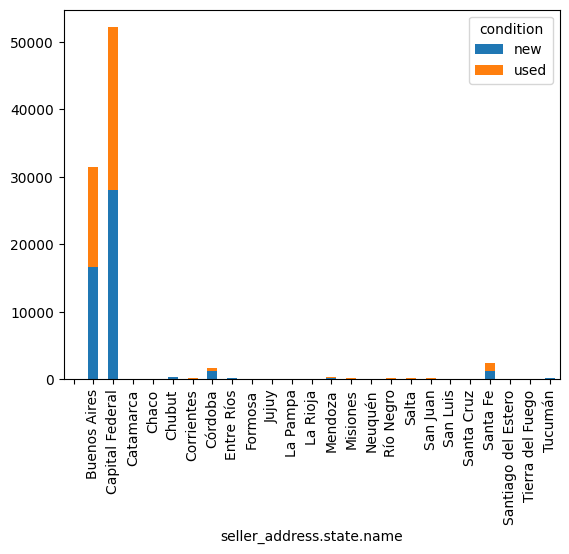

In [181]:
# Calculate the distribution of seller_address.country.name with respect to the condition
seller_address_state_name_counts = df_train.groupby(['seller_address.state.name', 'condition']).size().unstack()
display(seller_address_state_name_counts)
seller_address_state_name_counts.plot(kind = 'bar', stacked = True)
plt.show()


In [182]:
# Calculate the chi-square statistic and p-value for the seller_address.state.name with respect to the condition
seller_address_state_name_counts.fillna(0, inplace=True)
chi2, p, dof, expected = chi2_contingency(seller_address_state_name_counts)
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)


Chi-square statistic: 355.37453285340297
p-value: 1.009365529248608e-60
Degrees of freedom: 24
Expected values:
[[5.37244444e-01 4.62755556e-01]
 [1.69135296e+04 1.45684704e+04]
 [2.80135371e+04 2.41294629e+04]
 [1.07448889e+01 9.25511111e+00]
 [3.70698667e+01 3.19301333e+01]
 [1.79976889e+02 1.55023111e+02]
 [5.90968889e+01 5.09031111e+01]
 [9.27821156e+02 7.99178844e+02]
 [1.33773867e+02 1.15226133e+02]
 [1.50428444e+01 1.29571556e+01]
 [1.77290667e+01 1.52709333e+01]
 [3.76071111e+01 3.23928889e+01]
 [8.59591111e+00 7.40408889e+00]
 [2.14897778e+02 1.85102222e+02]
 [6.55438222e+01 5.64561778e+01]
 [4.67402667e+01 4.02597333e+01]
 [6.39320889e+01 5.50679111e+01]
 [7.03790222e+01 6.06209778e+01]
 [7.09162667e+01 6.10837333e+01]
 [3.00856889e+01 2.59143111e+01]
 [1.18193778e+01 1.01806222e+01]
 [1.28831218e+03 1.10968782e+03]
 [1.39683556e+01 1.20316444e+01]
 [5.37244444e+00 4.62755556e+00]
 [1.14970311e+02 9.90296889e+01]]


Some conclusions:
- The country is always Argentina so we can discard this field
- The state has shown some degree of relationship with the condition but in reality this may be missleading. If we look at the distributions we see that they items are in similar proportions between new and used in the states. My decision is to remove this column from our processing for the model.
- There are too many cities and likely not related to if an item is new or used, so we would leave also this field out.

In [183]:
# remove columns
df_train.drop(
    [
        'seller_address.country.name', 'seller_address.state.name', 'seller_address.city.name'
    ],
    axis = 1,
    inplace = True
)


condition,new,used
shipping.mode,,
custom,2107.0,1023.0
me1,86.0,NaN
me2,26277.0,19782.0
not_specified,19882.0,20843.0


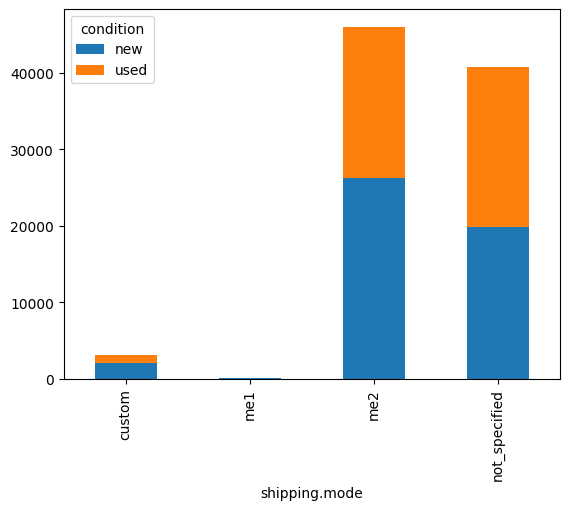

In [184]:
# Shipping mode
shipping_mode_counts = df_train.groupby(['shipping.mode', 'condition']).size().unstack()
display(shipping_mode_counts)
shipping_mode_counts.plot(kind = 'bar', stacked = True)
plt.show()


In [185]:
# Calculate the chi-square statistic and p-value for the shipping.mode with respect to the condition
shipping_mode_counts.fillna(0, inplace=True)
chi2, p, dof, expected = chi2_contingency(shipping_mode_counts)
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)


Chi-square statistic: 905.6367880134787
p-value: 5.30110030922176e-196
Degrees of freedom: 3
Expected values:
[[ 1681.57511111  1448.42488889]
 [   46.20302222    39.79697778]
 [24744.94186667 21314.05813333]
 [21879.28       18845.72      ]]


Shipping.mode can be added to the model under the same logic based on the distributions and the statistic tests.

## Datetime fields
let's analyize now the following fields:
```python
[
    'last_updated', 'date_created', 'stop_time', 'start_time'
]
```

In [186]:
from datetime import datetime
# start_time and end_time are epochs in milliseconds, so we need to convert them to datetime for further analysis.
# Transform stop_time and start_time to datetime format
df_train['start_time_dt'] = df_train['start_time'].apply(lambda x: datetime.fromtimestamp(x / 1000))
df_train['stop_time_dt'] = df_train['stop_time'].apply(lambda x: datetime.fromtimestamp(x / 1000))

# Transform date_created and last_updated to datetime format
df_train['date_created_dt'] = pd.to_datetime(df_train['date_created'])
df_train['last_updated_dt'] = pd.to_datetime(df_train['last_updated'])


--------------- days ---------------


count    90000.000000
mean         7.271925
std         21.349783
min         -0.000012
25%          0.000023
50%          0.000058
75%          6.047755
max        875.743029
Name: age_days, dtype: float64

--------------- hours ---------------


count    90000.000000
mean       174.526188
std        512.394796
min         -0.000278
25%          0.000556
50%          0.001389
75%        145.146111
max      21017.832707
Name: age_hours, dtype: float64

--------------- by condition ---------------


,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
new,48352.0,8.964826,23.504905,-0.000012,0.000023,0.000081,12.009097,875.743029
used,41648.0,5.306520,18.341372,-0.000012,0.000023,0.000046,0.024986,803.926053


Correlation between age and condition: 0.08543793611837937


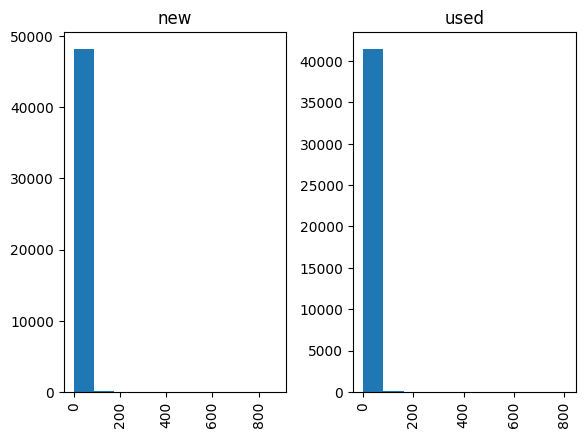

In [187]:
# Age of item: calculate the age of the item in days via the subsctraction of date_creatd and last_updated.
df_train['age'] = df_train['last_updated_dt'] - df_train['date_created_dt']
df_train['age_days'] = df_train['age'].apply(lambda x: x.total_seconds() / (60 * 60 * 24)) # in days
df_train['age_hours'] = df_train['age'].apply(lambda x: x.total_seconds() / (60 * 60)) # in hours
print("---" * 5, "days", "---" * 5)
display(df_train['age_days'].describe())
print("---" * 5, "hours", "---" * 5)
display(df_train['age_hours'].describe())

print("---" * 5, "by condition", "---" * 5)
display(df_train.groupby('condition')['age_days'].describe())

# Find correlation between age and condition
corr = df_train['age_days'].corr(df_train['condition'].apply(lambda x: 1 if x == 'new' else 0))
print(f"Correlation between age and condition: {corr}")

# Plot the distribution of age_days with respect to the condition
df_train.hist(column = 'age_days', by = 'condition')
plt.show()


There isn't much to draw from this variable, the correlation is slightly positive, indicating that new items tend to have higher age than used ones. Distributions are similar too, we could potentially use this feature for our model.

--------------- days ---------------


count    90000.000000
mean        60.935793
std         38.240336
min          0.398846
25%         60.000000
50%         60.000000
75%         60.000000
max       3457.052106
Name: duration_days, dtype: float64

--------------- hours ---------------


count    90000.000000
mean      1462.459034
std        917.768063
min          9.572314
25%       1440.000000
50%       1440.000000
75%       1440.000000
max      82969.250556
Name: duration_hours, dtype: float64

--------------- by condition ---------------


,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
new,48352.0,61.387664,49.007909,2.512350,60.0,60.0,60.0,3457.052106
used,41648.0,60.411185,19.265742,0.398846,60.0,60.0,60.0,835.965174


Correlation between duration and condition: 0.012732257770716278


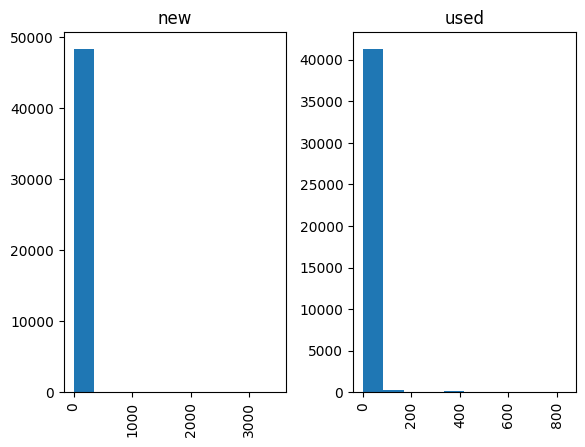

In [188]:
# Duration of the listing: calculate the duration of the listing in days via the subtraction of stop_time and start_time.
df_train['duration'] = df_train['stop_time_dt'] - df_train['start_time_dt']
df_train['duration_days'] = df_train['duration'].apply(lambda x: x.total_seconds() / (60 * 60 * 24)) # in days
df_train['duration_hours'] = df_train['duration'].apply(lambda x: x.total_seconds() / (60 * 60)) # in hours
print("---" * 5, "days", "---" * 5)
display(df_train['duration_days'].describe())
print("---" * 5, "hours", "---" * 5)
display(df_train['duration_hours'].describe())
print("---" * 5, "by condition", "---" * 5)
display(df_train.groupby('condition')['duration_days'].describe())

# Find correlation between duration and condition
corr = df_train['duration_days'].corr(df_train['condition'].apply(lambda x: 1 if x == 'new' else 0))
print(f"Correlation between duration and condition: {corr}")

# Plot the distribution of duration_days with respect to the condition
df_train.hist(column = 'duration_days', by = 'condition')
plt.show()


Similar conclusion, slightly positive correlation with less differences between new and used items in terms of duration and their distribution. We could use this variable too and later decide if we want to include it in the final model or not.

condition,new,used
date_created_day,,
Friday,7312,5811
Monday,8864,7234
Saturday,4807,4728
Sunday,4154,4675
Thursday,5898,5396
Tuesday,9514,7343
Wednesday,7803,6461


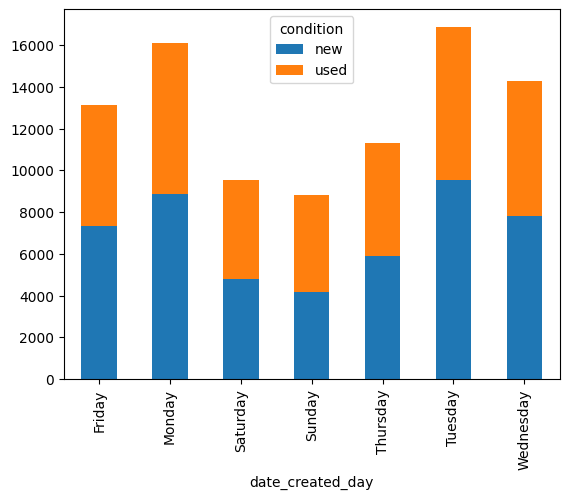

Chi-square statistic: 298.5846220413114
p-value: 1.6445076162375527e-61
Degrees of freedom: 6
Expected values:
[[7050.25884444 6072.74115556]
 [8648.56106667 7449.43893333]
 [5122.62577778 4412.37422222]
 [4743.3312     4085.6688    ]
 [6067.63875556 5226.36124444]
 [9056.3296     7800.6704    ]
 [7663.25475556 6600.74524444]]


In [189]:
# Day: Get the day when the item was created to see if there are any potential relations with the condition
df_train['date_created_day'] = df_train['date_created_dt'].dt.day_name()

# Calculate the chi-square statistic and p-value for the date_created_day with respect to the condition
date_created_day_counts = df_train.groupby(['date_created_day', 'condition']).size().unstack()
display(date_created_day_counts)
date_created_day_counts.plot(kind = 'bar', stacked = True)
plt.show()

date_created_day_counts.fillna(0, inplace=True)
chi2, p, dof, expected = chi2_contingency(date_created_day_counts)
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)


In [190]:
# Drop columns
df_train.drop('date_created_day', axis = 1, inplace = True)


Friday Tuesday and Wednesday are the days with higher degree of difference between used and news, but in reality this can be conincidential and not really related to an item being used or new. Actual;ly the Chi-square statistic shows a lower value and the expected values are closer to what we see in our counts. So we can take this field off the analysis

condition,new,used
date_created_month,,
April,22,18
August,10951,9574
December,10,19
February,25,16
January,5,8
July,115,121
June,41,31
March,11,13
May,30,36


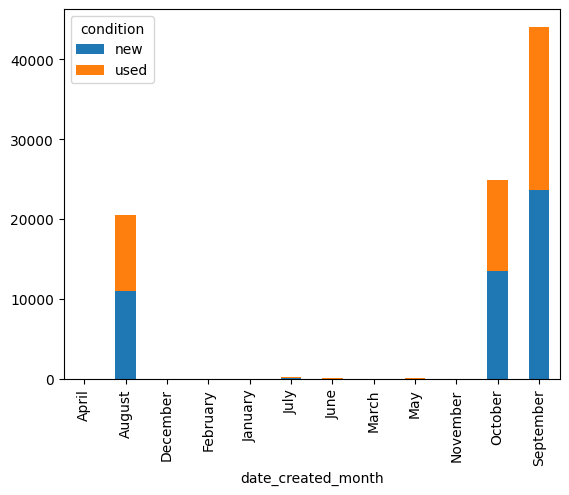

Chi-square statistic: 23.033870726060538
p-value: 0.017481731176537226
Degrees of freedom: 11
Expected values:
[[2.14897778e+01 1.85102222e+01]
 [1.10269422e+04 9.49805778e+03]
 [1.55800889e+01 1.34199111e+01]
 [2.20270222e+01 1.89729778e+01]
 [6.98417778e+00 6.01582222e+00]
 [1.26789689e+02 1.09210311e+02]
 [3.86816000e+01 3.33184000e+01]
 [1.28938667e+01 1.11061333e+01]
 [3.54581333e+01 3.05418667e+01]
 [1.39683556e+01 1.20316444e+01]
 [1.33462265e+04 1.14957735e+04]
 [2.36849586e+04 2.04010414e+04]]


In [191]:
# Seasonality: calculate the seasonality of the item based on the month when the item was created.
df_train['date_created_month'] = df_train['date_created_dt'].dt.month_name()

# Calculate the chi-square statistic and p-value for the date_created_month with respect to the condition
date_created_month_counts = df_train.groupby(['date_created_month', 'condition']).size().unstack()
display(date_created_month_counts)
date_created_month_counts.plot(kind = 'bar', stacked = True)
plt.show()

date_created_month_counts.fillna(0, inplace=True)
chi2, p, dof, expected = chi2_contingency(date_created_month_counts)
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)


Similar conclusion, nothing really important from the seasonality, the statistics are low. We will not use this field for our analysis.

In [192]:
# Drop columns
df_train.drop('date_created_month', axis = 1, inplace = True)


In [193]:
df_train.head()


,warranty,condition,base_price,non_mercado_pago_payment_methods,listing_type_id,price,buying_mode,tags,last_updated,pictures,id,accepts_mercadopago,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,initial_quantity,start_time,permalink,sold_quantity,available_quantity,shipping.local_pick_up,shipping.free_shipping,shipping.mode,non_mercado_pago_payment_methods_count,descriptions_count,pictures_count,start_time_dt,stop_time_dt,date_created_dt,last_updated_dt,age,age_days,age_hours,duration,duration_days,duration_hours
0,None,new,80.0,"[{'description': 'Transferencia bancaria', 'id...",bronze,80.0,buy_it_now,[dragged_bids_and_visits],2015-09-05T20:42:58.000Z,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA4695330653,True,http://mla-s1-p.mlstatic.com/5386-MLA469533065...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,True,False,not_specified,3.0,1.0,2.0,2015-09-05 17:42:53,2015-11-04 17:42:53,2015-09-05 20:42:53+00:00,2015-09-05 20:42:58+00:00,0 days 00:00:05,0.000058,0.001389,60 days 00:00:00,60.000000,1440.000000
1,NUESTRA REPUTACION,used,2650.0,"[{'description': 'Transferencia bancaria', 'id...",silver,2650.0,buy_it_now,[],2015-09-26T18:08:34.000Z,"[{'size': '499x334', 'secure_url': 'https://a2...",MLA7160447179,True,http://mla-s1-p.mlstatic.com/23223-MLA71604471...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,True,False,me2,2.0,1.0,6.0,2015-09-26 15:08:30,2015-11-25 15:08:30,2015-09-26 18:08:30+00:00,2015-09-26 18:08:34+00:00,0 days 00:00:04,0.000046,0.001111,60 days 00:00:00,60.000000,1440.000000
2,None,used,60.0,"[{'description': 'Transferencia bancaria', 'id...",bronze,60.0,buy_it_now,[dragged_bids_and_visits],2015-09-09T23:57:10.000Z,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7367189936,True,http://mla-s1-p.mlstatic.com/22076-MLA73671899...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,True,False,me2,3.0,1.0,1.0,2015-09-09 20:57:07,2015-11-08 20:57:07,2015-09-09 23:57:07+00:00,2015-09-09 23:57:10+00:00,0 days 00:00:03,0.000035,0.000833,60 days 00:00:00,60.000000,1440.000000
3,None,new,580.0,"[{'description': 'Transferencia bancaria', 'id...",silver,580.0,buy_it_now,[],2015-10-05T16:03:50.306Z,"[{'size': '441x423', 'secure_url': 'https://a2...",MLA9191625553,True,http://mla-s2-p.mlstatic.com/183901-MLA9191625...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,True,False,me2,3.0,1.0,2.0,2015-09-28 15:47:56,2015-12-03 22:13:16,2015-09-28 18:47:56+00:00,2015-10-05 16:03:50.306000+00:00,6 days 21:15:54.306000,6.886045,165.265085,66 days 06:25:20,66.267593,1590.422222
4,MI REPUTACION.,used,30.0,"[{'description': 'Transferencia bancaria', 'id...",bronze,30.0,buy_it_now,[dragged_bids_and_visits],2015-08-28T13:37:41.000Z,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7787961817,True,http://mla-s2-p.mlstatic.com/13595-MLA77879618...,Serenata - Jennifer Blake,False,2015-08-24T22:07:20.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1445638040000,active,1,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,True,False,not_specified,3.0,1.0,2.0,2015-08-24 19:07:20,2015-10-23 19:07:20,2015-08-24 22:07:20+00:00,2015-08-28 13:37:41+00:00,3 days 15:30:21,3.646076,87.505833,60 days 00:00:00,60.000000,1440.000000


### Final conclusion
From our EDA we were able to identify pontetial features to start using for modeling, we also defined the variables that are not going to be part of the models. We also discovered some relationships between some of the variables with respect to the condition and finally identified the variables that could be used for crafting new features and be part of the feature engineering process.

The list of 18 features are below:
- price
- listing_type_id
- buying_mode
- tags
- accepts_mercadopago
- automatic_relist
- status
- initial_quantity
- sold_quantity
- available_quantity
- shipping.local_pick_up
- shipping.free_shipping
- shipping.mode
- non_mercado_pago_payment_methods
- non_mercado_pago_payment_methods_count
- pictures_count
- age_days
- duration_days

The condition is the target variable. We will need pre-processing and some feature engineering and we will focus in that in the next section

# Pre Processing

## Data cleaning
Here we'll make sure our dataset does not have any duplicates, missing values and if necesary correcting errors in the data


In [194]:
df_train = df_train[
    [
    'price',
    'listing_type_id',
    'buying_mode',
    'tags',
    'accepts_mercadopago',
    'automatic_relist',
    'status',
    'initial_quantity',
    'sold_quantity',
    'available_quantity',
    'shipping.local_pick_up',
    'shipping.free_shipping',
    'shipping.mode',
    'non_mercado_pago_payment_methods',
    'non_mercado_pago_payment_methods_count',
    'pictures_count',
    'age_days',
    'duration_days',
    'condition',
    ]
]
df_train.head()


,price,listing_type_id,buying_mode,tags,accepts_mercadopago,automatic_relist,status,initial_quantity,sold_quantity,available_quantity,shipping.local_pick_up,shipping.free_shipping,shipping.mode,non_mercado_pago_payment_methods,non_mercado_pago_payment_methods_count,pictures_count,age_days,duration_days,condition
0,80.0,bronze,buy_it_now,[dragged_bids_and_visits],True,False,active,1,0,1,True,False,not_specified,"[{'description': 'Transferencia bancaria', 'id...",3.0,2.0,0.000058,60.000000,new
1,2650.0,silver,buy_it_now,[],True,False,active,1,0,1,True,False,me2,"[{'description': 'Transferencia bancaria', 'id...",2.0,6.0,0.000046,60.000000,used
2,60.0,bronze,buy_it_now,[dragged_bids_and_visits],True,False,active,1,0,1,True,False,me2,"[{'description': 'Transferencia bancaria', 'id...",3.0,1.0,0.000035,60.000000,used
3,580.0,silver,buy_it_now,[],True,False,active,1,0,1,True,False,me2,"[{'description': 'Transferencia bancaria', 'id...",3.0,2.0,6.886045,66.267593,new
4,30.0,bronze,buy_it_now,[dragged_bids_and_visits],True,False,active,1,0,1,True,False,not_specified,"[{'description': 'Transferencia bancaria', 'id...",3.0,2.0,3.646076,60.000000,used


In [195]:
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace = True, ascending = False)
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['name']
missing_values['percentage'] = round(missing_values / len(df_train), 2)
missing_values.head(10)


,count,percentage
name,,
non_mercado_pago_payment_methods_count,27531,0.31
pictures_count,703,0.01


In [196]:
# handle missing on non_mercado_pago_payment_methods_count and pictures count by replacing by 0
df_train['non_mercado_pago_payment_methods_count'].fillna(0, inplace = True)
df_train['pictures_count'].fillna(0, inplace = True)
# Check missing again (safety check)
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace = True, ascending = False)
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['name']
missing_values['percentage'] = round(missing_values / len(df_train), 2)
missing_values.head(10)


,count,percentage
name,,


In [197]:
df_train.dtypes


price                                     float64
listing_type_id                            object
buying_mode                                object
tags                                       object
accepts_mercadopago                          bool
automatic_relist                             bool
status                                     object
initial_quantity                            int64
sold_quantity                               int64
available_quantity                          int64
shipping.local_pick_up                       bool
shipping.free_shipping                       bool
shipping.mode                              object
non_mercado_pago_payment_methods           object
non_mercado_pago_payment_methods_count    float64
pictures_count                            float64
age_days                                  float64
duration_days                             float64
condition                                  object
dtype: object

## Data Normalization
In this section we will scale the data to a common range. This is useful for trying algorithms that are affected by variables being in different scales like distance based, linear models or neural networks. We will still keep the raw features for tree based algos like XGBoost or random forests.

In [198]:
from sklearn.preprocessing import StandardScaler

vars_to_scale = [
    'price', 'initial_quantity', 'sold_quantity', 'available_quantity',
    'non_mercado_pago_payment_methods_count', 'pictures_count',
    'age_days', 'duration_days'
]

scaler = StandardScaler()

vars_scaled = scaler.fit_transform(df_train[vars_to_scale])

df_train_scaled = df_train.copy()
df_train_scaled[vars_to_scale] = vars_scaled
df_train_scaled.head()


,price,listing_type_id,buying_mode,tags,accepts_mercadopago,automatic_relist,status,initial_quantity,sold_quantity,available_quantity,shipping.local_pick_up,shipping.free_shipping,shipping.mode,non_mercado_pago_payment_methods,non_mercado_pago_payment_methods_count,pictures_count,age_days,duration_days,condition
0,-0.006352,bronze,buy_it_now,[dragged_bids_and_visits],True,False,active,-0.080641,-0.068797,-0.080086,True,False,not_specified,"[{'description': 'Transferencia bancaria', 'id...",1.006993,-0.442123,-0.340608,-0.024471,new
1,-0.006069,silver,buy_it_now,[],True,False,active,-0.080641,-0.068797,-0.080086,True,False,me2,"[{'description': 'Transferencia bancaria', 'id...",0.297093,1.458821,-0.340609,-0.024471,used
2,-0.006354,bronze,buy_it_now,[dragged_bids_and_visits],True,False,active,-0.080641,-0.068797,-0.080086,True,False,me2,"[{'description': 'Transferencia bancaria', 'id...",1.006993,-0.917358,-0.340609,-0.024471,used
3,-0.006297,silver,buy_it_now,[],True,False,active,-0.080641,-0.068797,-0.080086,True,False,me2,"[{'description': 'Transferencia bancaria', 'id...",1.006993,-0.442123,-0.018074,0.139429,new
4,-0.006357,bronze,buy_it_now,[dragged_bids_and_visits],True,False,active,-0.080641,-0.068797,-0.080086,True,False,not_specified,"[{'description': 'Transferencia bancaria', 'id...",1.006993,-0.442123,-0.169832,-0.024471,used


## Data Transformation
In this section, let's transform the data into a numerical representation, this is specific to categorical to numerical and boolean to binary. In some cases I'll preserve the categories and just use label encoders and in others I will apply one hot encodig. This is useful if we want to try out different algorithms that will benefit from the representations.

In [199]:
# One-hot encode the categorical variables
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
ohe = OneHotEncoder()

def one_hot_encode(df: pd.DataFrame, column: str, drop: bool = False) -> pd.DataFrame:
    """
    This function takes a dataframe and a column name as input and returns a
    new dataframe with the one hot encoded values of the column.
    """
    # Create a copy of the dataframe to avoid modifying the original dataframe
    df_copy = df.copy()

    # One hot encode the column
    encoded_data = ohe.fit_transform(df_copy[[column]]).toarray()

    # Get the names of the new columns
    column_names = ohe.get_feature_names_out([column])

    # Create a new dataframe with the one hot encoded values
    encoded_df = pd.DataFrame(
        encoded_data,
        columns = column_names,
        index = df_copy.index
    )

    # Concatenate the new dataframe with the original one
    df_copy = pd.concat([df_copy, encoded_df], axis = 1)

    # Drop the original column
    if drop: df_copy.drop(column, axis = 1, inplace = True)

    return df_copy

# df_train_scaled['listing_type_id_encoded'] = le.fit_transform(df_train_scaled['listing_type_id'])
# One hot encode listing_type_id and add the new columns to the dataframe
df_train_scaled = one_hot_encode(df_train_scaled, 'listing_type_id', True)
df_train_scaled.head()

# One hot encode buying_mode and add the new columns to the dataframe
df_train_scaled = one_hot_encode(df_train_scaled, 'buying_mode', True)
df_train_scaled.head()

# One hot encode status and add the new columns to the dataframe
df_train_scaled = one_hot_encode(df_train_scaled, 'status', True)
df_train_scaled.head()

# One hot encode shipping.mode and add the new columns to the dataframe
df_train_scaled = one_hot_encode(df_train_scaled, 'shipping.mode', True)
df_train_scaled.head()


,price,tags,accepts_mercadopago,automatic_relist,initial_quantity,sold_quantity,available_quantity,shipping.local_pick_up,shipping.free_shipping,non_mercado_pago_payment_methods,non_mercado_pago_payment_methods_count,pictures_count,age_days,duration_days,condition,listing_type_id_bronze,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,buying_mode_auction,buying_mode_buy_it_now,buying_mode_classified,status_active,status_closed,status_not_yet_active,status_paused,shipping.mode_custom,shipping.mode_me1,shipping.mode_me2,shipping.mode_not_specified
0,-0.006352,[dragged_bids_and_visits],True,False,-0.080641,-0.068797,-0.080086,True,False,"[{'description': 'Transferencia bancaria', 'id...",1.006993,-0.442123,-0.340608,-0.024471,new,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.006069,[],True,False,-0.080641,-0.068797,-0.080086,True,False,"[{'description': 'Transferencia bancaria', 'id...",0.297093,1.458821,-0.340609,-0.024471,used,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.006354,[dragged_bids_and_visits],True,False,-0.080641,-0.068797,-0.080086,True,False,"[{'description': 'Transferencia bancaria', 'id...",1.006993,-0.917358,-0.340609,-0.024471,used,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.006297,[],True,False,-0.080641,-0.068797,-0.080086,True,False,"[{'description': 'Transferencia bancaria', 'id...",1.006993,-0.442123,-0.018074,0.139429,new,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.006357,[dragged_bids_and_visits],True,False,-0.080641,-0.068797,-0.080086,True,False,"[{'description': 'Transferencia bancaria', 'id...",1.006993,-0.442123,-0.169832,-0.024471,used,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [200]:
###############################
# Tags
###############################
def get_tags_dict(row):
    res = {
        'dragged_bids_and_visits': 0,
        'good_quality_thumbnail': 0,
        'dragged_visits': 0,
        'free_relist': 0,
        'poor_quality_thumbnail': 0
    }

    for val in row:
        res[val] = 1

    return res

def one_hot_encode_tags(df: pd.DataFrame, drop: bool = True):
    """
    This function takes a tag column and returns a dataframe with the one hot encoded values of the column.
    """
    # Create a copy of the dataframe to avoid modifying the original dataframe
    df_copy = df.copy()

    # One hot encode the column
    encoded_data = pd.json_normalize(df_copy['tags'].apply(get_tags_dict))

    # Concatenate the new dataframe with the original one
    df_copy = pd.concat([df_copy, encoded_data], axis = 1)

    # Drop the original column
    if drop: df_copy.drop('tags', axis = 1, inplace = True)

    return df_copy

df_train_scaled = one_hot_encode_tags(df_train_scaled)
df_train_scaled.head()


,price,accepts_mercadopago,automatic_relist,initial_quantity,sold_quantity,available_quantity,shipping.local_pick_up,shipping.free_shipping,non_mercado_pago_payment_methods,non_mercado_pago_payment_methods_count,pictures_count,age_days,duration_days,condition,listing_type_id_bronze,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,buying_mode_auction,buying_mode_buy_it_now,buying_mode_classified,status_active,status_closed,status_not_yet_active,status_paused,shipping.mode_custom,shipping.mode_me1,shipping.mode_me2,shipping.mode_not_specified,dragged_bids_and_visits,good_quality_thumbnail,dragged_visits,free_relist,poor_quality_thumbnail
0,-0.006352,True,False,-0.080641,-0.068797,-0.080086,True,False,"[{'description': 'Transferencia bancaria', 'id...",1.006993,-0.442123,-0.340608,-0.024471,new,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0
1,-0.006069,True,False,-0.080641,-0.068797,-0.080086,True,False,"[{'description': 'Transferencia bancaria', 'id...",0.297093,1.458821,-0.340609,-0.024471,used,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0
2,-0.006354,True,False,-0.080641,-0.068797,-0.080086,True,False,"[{'description': 'Transferencia bancaria', 'id...",1.006993,-0.917358,-0.340609,-0.024471,used,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0
3,-0.006297,True,False,-0.080641,-0.068797,-0.080086,True,False,"[{'description': 'Transferencia bancaria', 'id...",1.006993,-0.442123,-0.018074,0.139429,new,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0
4,-0.006357,True,False,-0.080641,-0.068797,-0.080086,True,False,"[{'description': 'Transferencia bancaria', 'id...",1.006993,-0.442123,-0.169832,-0.024471,used,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0


In [201]:
############################################
# non_mercado_pago_payment_methods
############################################
def get_payment_methods(x):
    if len(x) == 0:
        return []
    else:
        return [d['id'] for d in x]

def get_payment_methods_dict(row):
    res = {
        'MLATB': 0, 'MLAWC': 0, 'MLAMO': 0, 'MLAOT': 0, 'MLAMC': 0, 'MLAMS': 0, 'MLAVE': 0,
        'MLACD': 0, 'MLAVS': 0, 'MLADC': 0, 'MLAAM': 0, 'MLAWT': 0, 'MLAMP': 0, 'MLABC': 0
    }

    for val in row:
        res[val] = 1

    return res

def one_hot_encode_payment_methods(df: pd.DataFrame, drop: bool = True):
    """
    This function takes a payment methods column and returns a dataframe with the one hot encoded values of the column.
    """
    # Create a copy of the dataframe to avoid modifying the original dataframe
    df_copy = df.copy()

    # transform column to list of ids
    df_copy['non_mercado_pago_payment_methods'] = df_copy['non_mercado_pago_payment_methods'].apply(get_payment_methods)

    # One hot encode the column
    encoded_data = pd.json_normalize(df_copy['non_mercado_pago_payment_methods'].apply(get_payment_methods_dict))

    # Concatenate the new dataframe with the original one
    df_copy = pd.concat([df_copy, encoded_data], axis = 1)

    # Drop the original column
    if drop: df_copy.drop('non_mercado_pago_payment_methods', axis = 1, inplace = True)

    return df_copy

df_train_scaled = one_hot_encode_payment_methods(df_train_scaled)
df_train_scaled.head()


,price,accepts_mercadopago,automatic_relist,initial_quantity,sold_quantity,available_quantity,shipping.local_pick_up,shipping.free_shipping,non_mercado_pago_payment_methods_count,pictures_count,age_days,duration_days,condition,listing_type_id_bronze,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,buying_mode_auction,buying_mode_buy_it_now,buying_mode_classified,status_active,status_closed,status_not_yet_active,status_paused,shipping.mode_custom,shipping.mode_me1,shipping.mode_me2,shipping.mode_not_specified,dragged_bids_and_visits,good_quality_thumbnail,dragged_visits,free_relist,poor_quality_thumbnail,MLATB,MLAWC,MLAMO,MLAOT,MLAMC,MLAMS,MLAVE,MLACD,MLAVS,MLADC,MLAAM,MLAWT,MLAMP,MLABC
0,-0.006352,True,False,-0.080641,-0.068797,-0.080086,True,False,1.006993,-0.442123,-0.340608,-0.024471,new,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,-0.006069,True,False,-0.080641,-0.068797,-0.080086,True,False,0.297093,1.458821,-0.340609,-0.024471,used,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,-0.006354,True,False,-0.080641,-0.068797,-0.080086,True,False,1.006993,-0.917358,-0.340609,-0.024471,used,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
3,-0.006297,True,False,-0.080641,-0.068797,-0.080086,True,False,1.006993,-0.442123,-0.018074,0.139429,new,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
4,-0.006357,True,False,-0.080641,-0.068797,-0.080086,True,False,1.006993,-0.442123,-0.169832,-0.024471,used,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [202]:
############################################
# accepts_mercadopago (boolean)
############################################
df_train_scaled['accepts_mercadopago'] = df_train_scaled['accepts_mercadopago'].astype(int)

############################################
# automatic_relist (boolean)
############################################
df_train_scaled['automatic_relist'] = df_train_scaled['automatic_relist'].astype(int)

############################################
# shipping.local_pick_up (boolean)
############################################
df_train_scaled['shipping.local_pick_up'] = df_train_scaled['shipping.local_pick_up'].astype(int)

############################################
# shipping.free_shipping (boolean)
############################################
df_train_scaled['shipping.free_shipping'] = df_train_scaled['shipping.free_shipping'].astype(int)


In [203]:
# Encode the condition column
class CustomLabelEncoder(LabelEncoder):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # Define the desired mapping
        self.mapping = {'new': 1, 'used': 0}

    def fit(self, y):
        super().fit(list(self.mapping.keys()))

    def transform(self, y):
        return [self.mapping[item] for item in y]

    def fit_transform(self, y):
        self.fit(y)
        return self.transform(y)

label_encoder = CustomLabelEncoder()

df_train_scaled['condition'] = label_encoder.fit_transform(df_train_scaled['condition'])

mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)


{'new': 1, 'used': 0}


In [204]:
df_train_scaled.head()


,price,accepts_mercadopago,automatic_relist,initial_quantity,sold_quantity,available_quantity,shipping.local_pick_up,shipping.free_shipping,non_mercado_pago_payment_methods_count,pictures_count,age_days,duration_days,condition,listing_type_id_bronze,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,buying_mode_auction,buying_mode_buy_it_now,buying_mode_classified,status_active,status_closed,status_not_yet_active,status_paused,shipping.mode_custom,shipping.mode_me1,shipping.mode_me2,shipping.mode_not_specified,dragged_bids_and_visits,good_quality_thumbnail,dragged_visits,free_relist,poor_quality_thumbnail,MLATB,MLAWC,MLAMO,MLAOT,MLAMC,MLAMS,MLAVE,MLACD,MLAVS,MLADC,MLAAM,MLAWT,MLAMP,MLABC
0,-0.006352,1,0,-0.080641,-0.068797,-0.080086,1,0,1.006993,-0.442123,-0.340608,-0.024471,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,-0.006069,1,0,-0.080641,-0.068797,-0.080086,1,0,0.297093,1.458821,-0.340609,-0.024471,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,-0.006354,1,0,-0.080641,-0.068797,-0.080086,1,0,1.006993,-0.917358,-0.340609,-0.024471,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
3,-0.006297,1,0,-0.080641,-0.068797,-0.080086,1,0,1.006993,-0.442123,-0.018074,0.139429,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
4,-0.006357,1,0,-0.080641,-0.068797,-0.080086,1,0,1.006993,-0.442123,-0.169832,-0.024471,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [208]:
corr = df_train_scaled.corr()

fig = px.imshow(
    corr,
    color_continuous_scale = px.colors.diverging.RdBu,
    title = 'Correlation Matrix'
)

# Customize the layout
fig.update_layout(
    width = 1200,
    height = 1200,
    xaxis_showgrid = False,
    yaxis_showgrid = False,
    xaxis_title = '',
    yaxis_title = '',
    font_family = 'Arial',
    font_size = 12,
    title_font_family = 'Arial',
    title_font_size = 24,
    title_x = 0.5,
    title_y = 0.95,
    margin = dict(l = 50, r = 50, t = 100, b = 50),
    coloraxis_colorbar = dict(
        title = 'Correlation',
        titleside = 'right',
        titlefont = dict(
            family = 'Arial',
            size = 16
        ),
        thickness = 20,
        len = 0.8,
        yanchor = 'middle',
        ticks = 'outside',
        tickfont = dict(
            family = 'Arial',
            size = 8
        )
    )
)

fig.show()


# Final thoughts
We now have a dataset that can be used for training a machine learning model. In the plot from above, we can see the correlation between all the individual features plus the target variable. There are some interesting conclusions that we can draw from it, such as the relation between automatic_relist, accepts_mercado_pago, free_shipping, listing_types, buying_modes, and others.

To keep the code clean we will create another notebook that will take the dataset, clean it the way we have done it here and perform ML model related tasks, including the training of the model and the evaluation.